### Problem Statement: A company wants to optimize its delivery system, for that it wants insigts from its goods delivery data and wants to predict that if a perticular item reaches its destination on time or not.

### To solve this problem in this project insigts are provided from the EDA and machine learning algorithems are used to predict if a product is delivered on time or not.

About the dataset:

The data set contains 10999 entries for the deliveries made, with columns descibed below.

1. ID: The customer shopping ID, describes the unqiue customer id.
2. Mode_of_Shipment: It describes which mode of shipment that was used i.e. Ship, Flight or Road.
3. Customer_care_calls: Quantifies the number of times a customer called the customer call center to inquire about their product.
4. Customer_rating: Rating provided by the customer for the product.
5. Cost_of_the_Product: Cost of the product. Information about the currency was not available.
6. Prior_purchases: The number of times the customer has made a purchase. 
7. Product_importance: The delivery importance of the product.
8. Gender: Gender of the customer.
9. Discount_offered: The amount of discount offerred for the product.
10. Weight_in_gms: The weight of the product
11. Reached.on.Time_Y.N: If the product reached the customer on time or not. Classified as 1 (reached on time) and 0 (Didn't Reach on time.)


System specification:

Type: Laptop 

Name: Acer Nitro 5

Processor: Ryzen 7 7735HS Octa-Core Processor 

Ram : 16GB (DDR5)

GPU: Nvidia RTX 3050

## EDA and Preprocessing 

In [2]:
# Importing the basic libraries.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import mplcyberpunk
import time

# Cyberpunk theme 
plt.style.use('cyberpunk')

# ggplot theme 
# plt.style.use('ggplot')

In [3]:
# Loading the dataset

data = pd.read_csv('train.csv')

In [4]:
# Getting first few columns of the dataset
data.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

It was found that id is just indexing from 1, we do not need this column for EDA or machine learning, so we remove this column.

In [5]:
# Droppin the id column
data.drop('ID',axis=1,inplace=True)

In [6]:
# getting basic information about the columns 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


It seems there are no missing data in the columns, we cross check this fact below.

In [7]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

There are indeed no missing values. Now we get some statistical infomation about the numerical columns. 

In [8]:
# getting idea of the numrical columns
data.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

Now we want to see that if there is a significant correlation between the features. 

Text(0.5, 1.0, 'Correlation Between the Numercial Features')

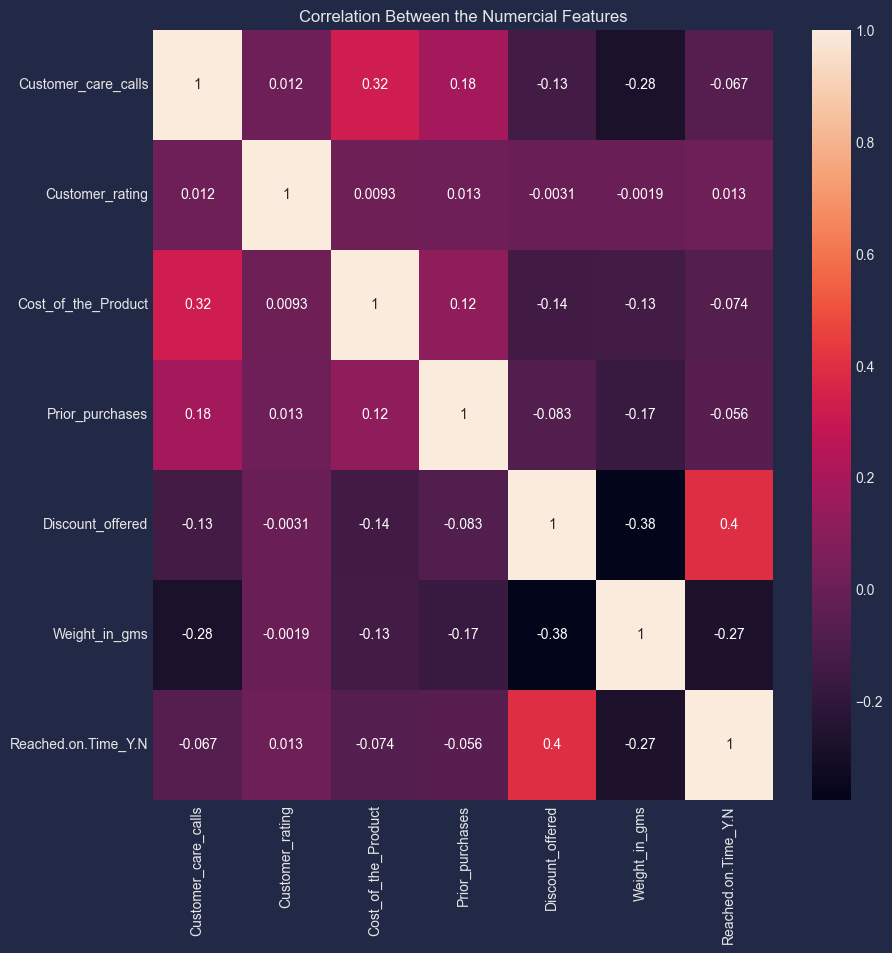

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data.select_dtypes(exclude=object).corr(),cmap="rocket",annot=True)
plt.title('Correlation Between the Numercial Features')

The highest correletion is observed between Discount offered and Reached.on.Time_Y.N

# Exploratory Data Analysis

## Exploring the categorical features

Checking out the delivery performance for each warehouse.

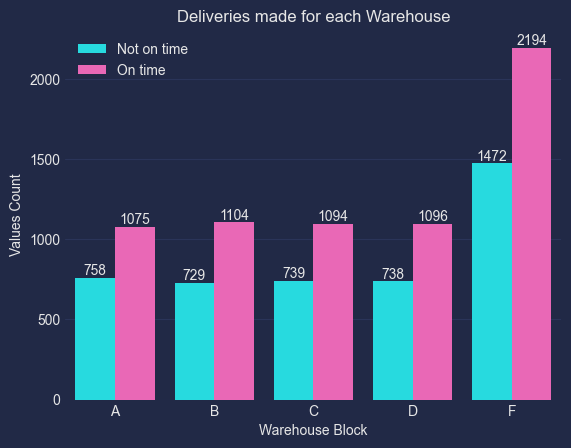

In [10]:
# Count plot for deliveries made per Warehouse block.
ax = sns.countplot(data=data,x = 'Warehouse_block',hue='Reached.on.Time_Y.N',order=data['Warehouse_block'].value_counts(ascending=True).index)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Warehouse Block')
plt.ylabel('Values Count')
plt.title('Deliveries made for each Warehouse')
plt.legend(['Not on time','On time'])
plt.show()

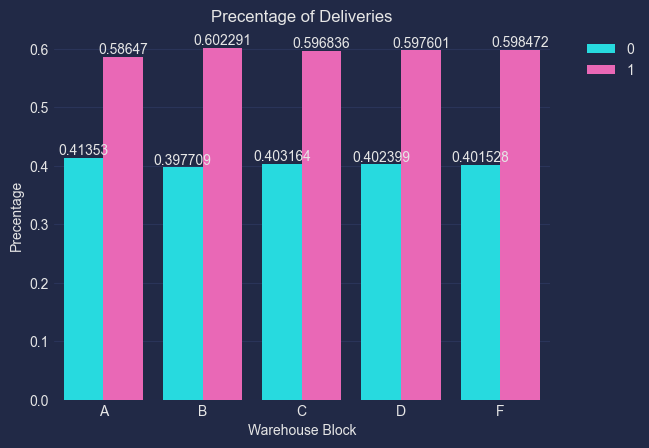

In [10]:
# Preparing the data fot plotting a percentage plot for each wearhouse.
mos_data = data.groupby('Warehouse_block')['Reached.on.Time_Y.N'].value_counts()/data['Warehouse_block'].value_counts()
mos_data.index.names = ['Warehouse_block', 'Reached_on_Time_Y_N']
mos_data = mos_data.reset_index(name='count')
mos_data

# Plotting using seaborn
ax = sns.barplot(data=mos_data, x='Warehouse_block', y='count', hue='Reached_on_Time_Y_N')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Precentage of Deliveries')
plt.xlabel('Warehouse Block')
plt.ylabel('Precentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Checking deliveries made for mode of shipment. 

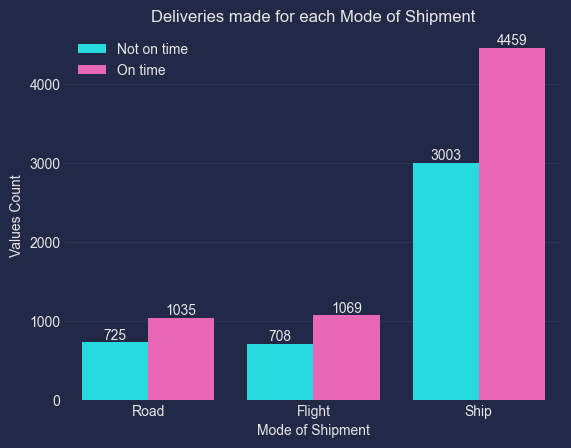

In [11]:
# Count plot for deliveries made per Warehouse block.
ax = sns.countplot(data=data,x = 'Mode_of_Shipment',hue='Reached.on.Time_Y.N',order=data['Mode_of_Shipment'].value_counts(ascending=True).index)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Mode of Shipment')
plt.ylabel('Values Count')
plt.title('Deliveries made for each Mode of Shipment')
plt.legend(['Not on time','On time'])
plt.show()

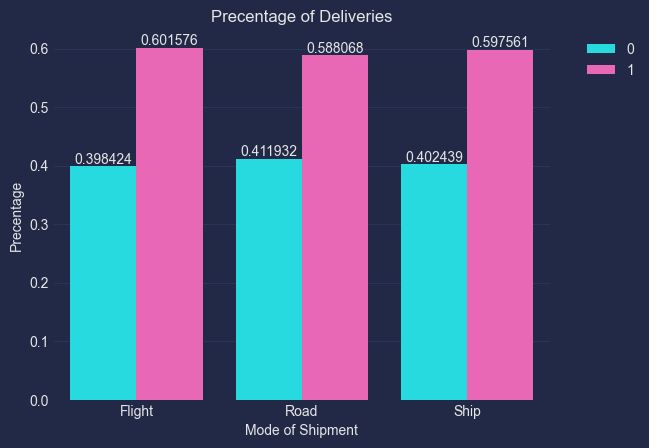

In [12]:
# Preparing the data fot plotting a percentage plot for mode of shipment. 
mos_data = data.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].value_counts()/data['Mode_of_Shipment'].value_counts()
mos_data.index.names = ['Mode_of_Shipment', 'Reached_on_Time_Y_N']
mos_data = mos_data.reset_index(name='count')
mos_data

# Plotting using seaborn
ax = sns.barplot(data=mos_data, x='Mode_of_Shipment', y='count', hue='Reached_on_Time_Y_N')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Precentage of Deliveries')
plt.xlabel('Mode of Shipment')
plt.ylabel('Precentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The most frequently used mode of shipment is Ship. 

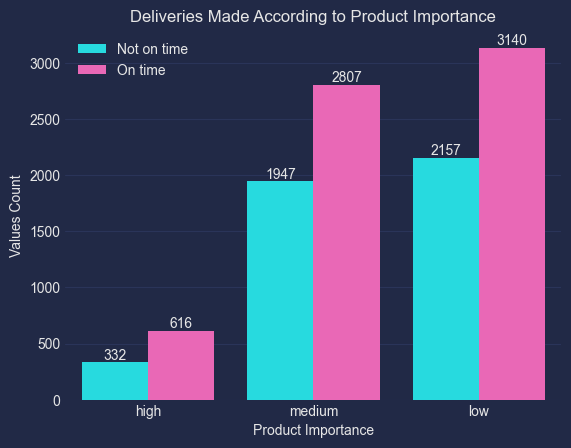

In [13]:
# Count plot for deliveries made on the basis of Product Importance.
ax = sns.countplot(data=data,x = 'Product_importance',hue='Reached.on.Time_Y.N',order=data['Product_importance'].value_counts(ascending=True).index)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Product Importance')
plt.ylabel('Values Count')
plt.title('Deliveries Made According to Product Importance')
plt.legend(['Not on time','On time'])
plt.show()

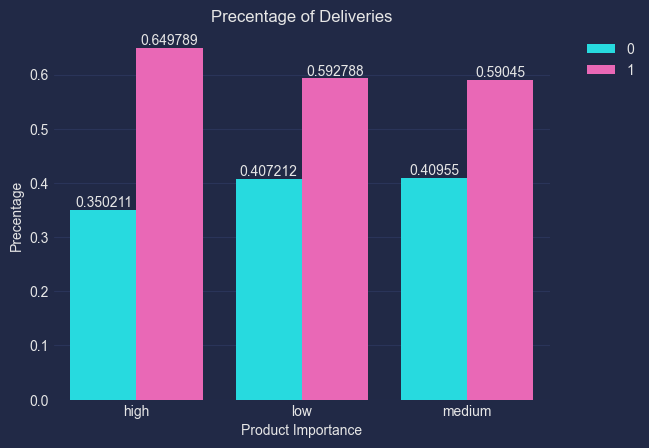

In [14]:
# Preparing the data fot plotting a percentage plot for mode of shipment. 
mos_data = data.groupby('Product_importance')['Reached.on.Time_Y.N'].value_counts()/data['Product_importance'].value_counts()
mos_data.index.names = ['Product_importance', 'Reached_on_Time_Y_N']
mos_data = mos_data.reset_index(name='count')
mos_data

# Plotting using seaborn
ax = sns.barplot(data=mos_data, x='Product_importance', y='count', hue='Reached_on_Time_Y_N')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Precentage of Deliveries')
plt.xlabel('Product Importance')
plt.ylabel('Precentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Products of 'high' importance were observed to have a 5% more chance of getting delivered on time.

Exploring the numerical features.

Chechking out the distribution of cost of the product.

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1500 with 0 Axes>

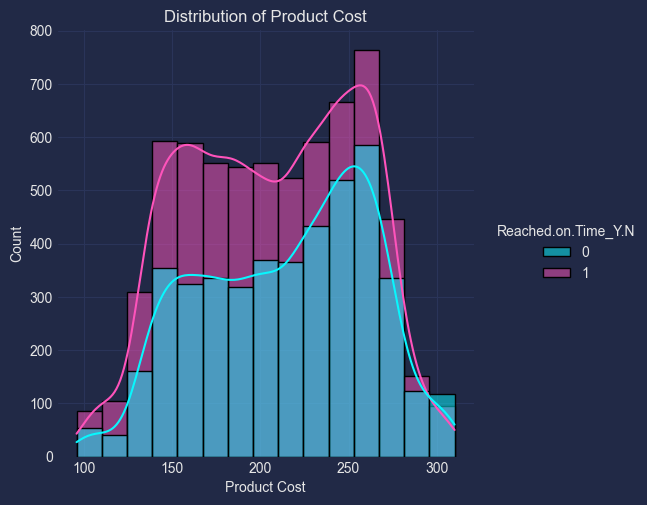

In [15]:
# Creating a distplot for cost of product.
plt.figure(figsize=(10,15))
sns.displot(data=data,x='Cost_of_the_Product',kde = True,hue='Reached.on.Time_Y.N',alpha = 0.5,bins = 15)
plt.xlabel('Product Cost')
plt.ylabel('Count')
plt.title('Distribution of Product Cost')
plt.show()

It was observed for majority of the price range, the products which are getting delivered on time are greater than the producst which are not delivered on time except for higher range products i.e. the products around the price range of 300. There is greater chance that the product in this price range will not get delivered on time.

Creating a distribution plot for the discount offered on the product.

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1500 with 0 Axes>

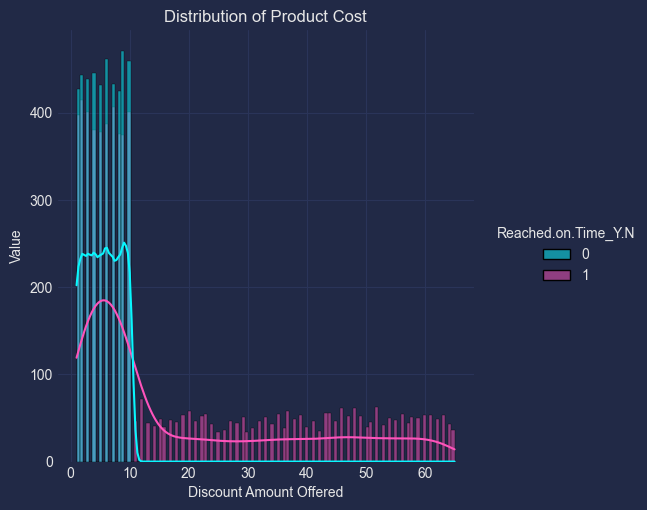

In [16]:
# Creating a distplot for Discount Offered on the product.
plt.figure(figsize=(10,15))
sns.displot(data=data,x='Discount_offered',kde = True,hue='Reached.on.Time_Y.N',alpha = 0.5)
plt.xlabel('Discount Amount Offered')
plt.ylabel('Value')
plt.title('Distribution of Product Cost')
plt.show()

It is obsered that products with discount higher than 10 are delivered mostly on time. A reason for this can be that generally discounts are offered when the company wants to empty its warehouse for new inventory.

Now we check does weight of the product has a effect on the delivery time or not?

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1500 with 0 Axes>

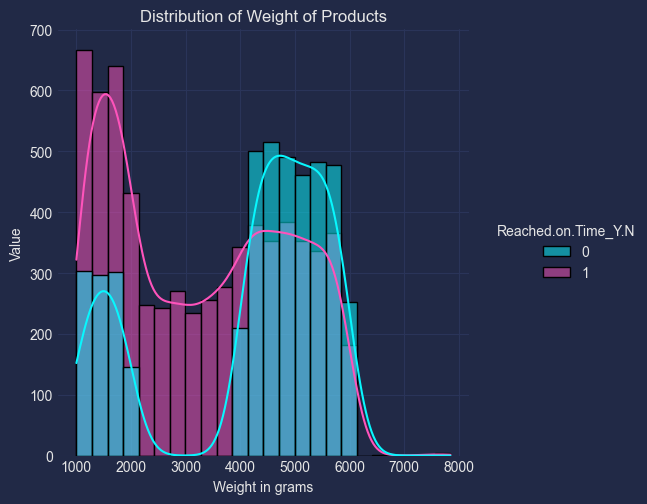

In [17]:
# Creating a distplot for Discount Offered on the product.
plt.figure(figsize=(10,15))
sns.displot(data=data,x='Weight_in_gms',kde = True,hue='Reached.on.Time_Y.N',alpha = 0.5)
plt.xlabel('Weight in grams')
plt.ylabel('Value')
plt.title('Distribution of Weight of Products')
plt.show()

It was observed that the there is higher number of products delivered on time in the weight range 1000-2000. In 2000-4000 the products delivered on time there were no products that were late in delivery. This is checked by using the below code.

In [18]:
# Checking the delivery was made on time or not for the weight range 2000-4000 of the product.
data[(data['Weight_in_gms'] > 2000) & (data['Weight_in_gms'] <4000)]['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    1786
Name: count, dtype: int64

Now in the Weight range between 4000-6000 it is observed that there is a greater chance of getting the product delivered late than getting the product delivered on time.

## Machine Learning : Classification Problem

In [19]:
# Importing the requirements from sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif,f_classif,chi2


In [165]:
# function which plots accuracy scores, F1 score, along with time taken to fit for the models.
def search_plots(df):
    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df,y = df.index,x = 'Accuracy Score',hue=df.index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Accuracy Score for Different Models')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df,y = df.index,x = 'F1',hue=df.index,order= df['F1'].sort_values(ascending=False).index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('F1 Score for Different Models')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df,y = df.index,x = 'Time Taken',hue=df.index,order= df['Time Taken'].sort_values(ascending=False).index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Model Fitting Time for Different Models')
    plt.xticks(rotation=45)
    plt.show()

In [20]:
# transforming the categorical columns 

for column in data.select_dtypes(include=object).columns:
    le = LabelEncoder()
    le.fit(data[column].unique())
    data[column] = le.transform(data[column])

In [21]:
# Features 
X = data.drop('Reached.on.Time_Y.N',axis=1)

# Target Variable
y = data['Reached.on.Time_Y.N']

In [22]:
# Sppliting the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We Now make a function to calculate the machine learning models and return Accuracy, Classification Report and Confusion Matrix

In [23]:
# we first create a dictionary of the required models.

def fit_models(X_train, X_test, y_train, y_test):

    # Making a list of ML Classifiers 

    classifiers = {'Logistic Regression Classifier':LogisticRegressionCV(),
               'KNN Classifier':KNeighborsClassifier(),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Random Forest Classifier':RandomForestClassifier(),
               'Support Vector Machine':SVC(),
               'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'xgboost Classifier':XGBClassifier(),
               'CatBoost Classifier' : CatBoostClassifier(logging_level='Silent'),
               'Bayes Classifier': GaussianNB()}
    
    # Making a list to store the model accurary rate scores
    Model_acc_score = [] 

    # Making a list to store model precision val
    model_precision_val = []

    # Making a list to store model recall
    model_recall_val = []

    # Making a list to store F1 score
    model_F1_score = []
         
    # Making a index for containing the model names 
    index1 = []

    # Making a list to store time taken 
    time_taken = []

    # Using for loop to implement different machine learning models 
    for i in classifiers:

        begin = time.time()
        model = classifiers[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        end = time.time()
        index1.append(i)
        Model_acc_score.append(accuracy_score(y_test,y_pred))
        model_precision_val.append(precision_score(y_test,y_pred))
        model_recall_val.append(recall_score(y_test,y_pred))
        model_F1_score.append(f1_score(y_test,y_pred))
        time_taken.append(end-begin)
    
    # Creating a Data Frame to contain the calculated valued for model accuracy, precision, recall and f1 score.
    table = pd.DataFrame(data = np.array([Model_acc_score,model_precision_val,model_recall_val,model_F1_score,time_taken]).T,
                         columns = ['Accuracy Score','Precision','Recall','F1','Time Taken'],index=index1)
    table.index.name = 'Models'
    table_sorted = table.sort_values(by='Accuracy Score', ascending=False)
    print('\n')
    print(f'Total time taken is {sum(time_taken)} sec')
    return table_sorted

In [24]:
# fitting different machine learning models.
all_model_fit = fit_models(X_train, X_test, y_train, y_test)
all_model_fit

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st



Total time taken is 8.92256498336792 sec


Accuracy Score  Precision    Recall        F1  \
Models                                                                          
Gradient Boosting Classifier          0.686364   0.863046  0.560153  0.679368   
Support Vector Machine                0.673182   0.738211  0.695785  0.716371   
xgboost Classifier                    0.671364   0.744128  0.679693  0.710453   
CatBoost Classifier                   0.669091   0.778206  0.618391  0.689155   
Random Forest Classifier              0.663636   0.759412  0.633716  0.690894   
Bayes Classifier                      0.656364   0.980736  0.429119  0.597015   
KNN Classifier                        0.653636   0.716335  0.688889  0.702344   
Decision Tree Classifier              0.644091   0.702012  0.695019  0.698498   
Logistic Regression Classifier        0.635909   0.695652  0.686590  0.691091   

                                Time Taken  
Models                                      
Gradient Boosting Classifier      0.773154  
Support Vector Machine            2.321629  
xgboost Classifier                1.528702  
CatBoost Classifier               2.599635  
Random Forest Classifier          1.083608  
Bayes Classifier                  0.005187  
KNN Classifier                    0.064626  
Decision Tree Classifier          0.039683  
Logistic Regression Classifier    0.506340

In [59]:
all_model_fit

Accuracy Score  Precision    Recall        F1  \
Models                                                                          
Gradient Boosting Classifier          0.686364   0.863046  0.560153  0.679368   
Support Vector Machine                0.673182   0.738211  0.695785  0.716371   
xgboost Classifier                    0.671364   0.744128  0.679693  0.710453   
CatBoost Classifier                   0.669091   0.778206  0.618391  0.689155   
Random Forest Classifier              0.663636   0.759412  0.633716  0.690894   
Bayes Classifier                      0.656364   0.980736  0.429119  0.597015   
KNN Classifier                        0.653636   0.716335  0.688889  0.702344   
Decision Tree Classifier              0.644091   0.702012  0.695019  0.698498   
Logistic Regression Classifier        0.635909   0.695652  0.686590  0.691091   

                                Time Taken  
Models                                      
Gradient Boosting Classifier      0.773154  
Support Vector Machine            2.321629  
xgboost Classifier                1.528702  
CatBoost Classifier               2.599635  
Random Forest Classifier          1.083608  
Bayes Classifier                  0.005187  
KNN Classifier                    0.064626  
Decision Tree Classifier          0.039683  
Logistic Regression Classifier    0.506340

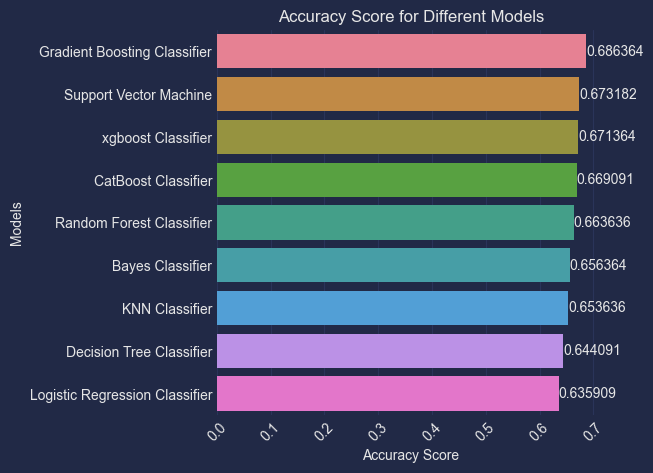

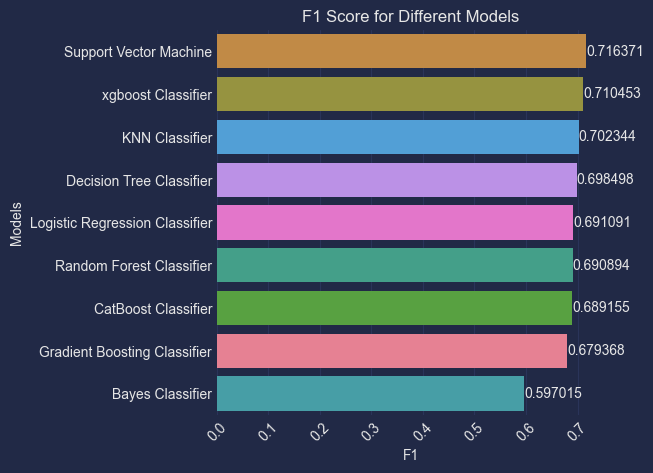

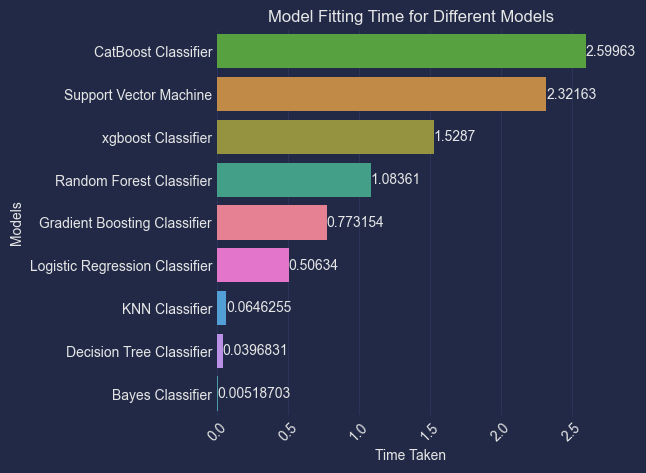

In [164]:
search_plots(all_model_fit)

### Observations

Gradient Boosting Classifier gives the best result in terms of 'Accuracy Score'. 

Support Vector Machine gives the best result in terms of 'F1 Score'

## Feature Selection 

Selected the best features in the dataset by using the statistical methods like MI Score, F-Statistic and Chi2 score. Also Fitted different classification models to check the 

In [25]:
# Creating an instance of features for feature selection. 
X = data.drop('Reached.on.Time_Y.N',axis= 1)
y = data['Reached.on.Time_Y.N']

1. Mutual Information Score

In [26]:


# Definiing a function to get mi scores.
def get_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# getting the mi score for the features
mi_scores = get_mi_scores(X,y)
print(mi_scores)

Discount_offered       0.150570
Weight_in_gms          0.120247
Mode_of_Shipment       0.006609
Customer_rating        0.005250
Customer_care_calls    0.004468
Cost_of_the_Product    0.004168
Warehouse_block        0.000894
Prior_purchases        0.000000
Product_importance     0.000000
Gender                 0.000000
Name: MI Scores, dtype: float64


Now we select the best 6 features on the basis of MI Score.

In [27]:
# Getting the column names for the first six features by MI score
key_features_1 = mi_scores[0:6].index

# Fiiting the models on the key features 'filtered' using MI score.
Mi_s_fit_models = fit_models(X_train[key_features_1], X_test[key_features_1], y_train, y_test)
Mi_s_fit_models



Total time taken is 6.996412038803101 sec


Accuracy Score  Precision    Recall        F1  \
Models                                                                          
Gradient Boosting Classifier          0.685909   0.875306  0.548659  0.674517   
Support Vector Machine                0.672273   0.738173  0.693487  0.715132   
CatBoost Classifier                   0.669545   0.782227  0.613793  0.687849   
Random Forest Classifier              0.662273   0.739353  0.665134  0.700282   
xgboost Classifier                    0.660909   0.739503  0.661303  0.698220   
Decision Tree Classifier              0.654545   0.702904  0.723372  0.712991   
Bayes Classifier                      0.654091   0.972222  0.429119  0.595428   
KNN Classifier                        0.650000   0.711797  0.688889  0.700156   
Logistic Regression Classifier        0.631818   0.692907  0.681226  0.687017   

                                Time Taken  
Models                                      
Gradient Boosting Classifier      0.648465  
Support Vector Machine            2.302179  
CatBoost Classifier               2.497152  
Random Forest Classifier          1.030646  
xgboost Classifier                0.046767  
Decision Tree Classifier          0.034732  
Bayes Classifier                  0.000750  
KNN Classifier                    0.061784  
Logistic Regression Classifier    0.373938

### Observations: For models fit on the features selected my MI score.

Gradient Boosting Classifier gives the best result in terms of 'Accuracy Score'. 

Support Vector Machine gives the best result in terms of 'F1 Score'.

2. F-Statistic Score

In [28]:
# Defining a function to calculate the 'f-statitic'
def get_f_classif_scores(X,y):
    return pd.Series(f_classif(X,y)[0],name="f_classif_scores",index = X.columns).sort_values(ascending=False)

# Getting the f_classif_scores
f_scores = get_f_classif_scores(X,y)
print(f_scores)

Discount_offered       2058.842985
Weight_in_gms           856.401798
Cost_of_the_Product      59.873829
Customer_care_calls      49.775450
Prior_purchases          33.996610
Product_importance        6.067802
Customer_rating           1.892885
Warehouse_block           0.298951
Gender                    0.241780
Mode_of_Shipment          0.003151
Name: f_classif_scores, dtype: float64


In [29]:
# Getting the columns names for the first five features by 'f statistic'.

key_features_2 = f_scores[0:5].index

# Fiiting the models on the key features 'filtered' using f score.

f_s_fit_models = fit_models(X_train[key_features_2], X_test[key_features_2], y_train, y_test)
f_s_fit_models



Total time taken is 6.986993074417114 sec


Accuracy Score  Precision    Recall        F1  \
Models                                                                          
Gradient Boosting Classifier          0.685000   0.884422  0.539464  0.670157   
Random Forest Classifier              0.677727   0.752971  0.679693  0.714458   
CatBoost Classifier                   0.674545   0.795386  0.607663  0.688966   
Support Vector Machine                0.672273   0.739344  0.691188  0.714455   
Decision Tree Classifier              0.661818   0.710428  0.725670  0.717968   
xgboost Classifier                    0.659545   0.736395  0.663602  0.698106   
Bayes Classifier                      0.654091   0.978873  0.426054  0.593700   
KNN Classifier                        0.649545   0.712242  0.686590  0.699181   
Logistic Regression Classifier        0.633182   0.693624  0.683525  0.688537   

                                Time Taken  
Models                                      
Gradient Boosting Classifier      0.639278  
Random Forest Classifier          1.138055  
CatBoost Classifier               2.483782  
Support Vector Machine            2.171584  
Decision Tree Classifier          0.046892  
xgboost Classifier                0.053142  
Bayes Classifier                  0.007171  
KNN Classifier                    0.053391  
Logistic Regression Classifier    0.393698

### Observations: For models fit on the features selected my f-statistic score.

Gradient Boosting Classifier gives the best result in terms of 'Accuracy Score'. 

Support Vector Machine gives the best result in terms of 'F1 Score'.

In [30]:
# Importing the requirement from sklearn
from sklearn.feature_selection import chi2

# Defining a function to calculate the 'chi2-statitic'
def get_chi2_scores(X,y):
    return pd.Series(chi2(X,y)[0],name="chi2_scores",index = X.columns).sort_values(ascending=False)

chi2_scores = get_chi2_scores(X,y)
print(chi2_scores)

Weight_in_gms          584786.397638
Discount_offered        34058.262984
Cost_of_the_Product       654.513914
Prior_purchases            22.033260
Customer_care_calls        15.925914
Product_importance          1.796521
Customer_rating             1.264718
Warehouse_block             0.284732
Gender                      0.121910
Mode_of_Shipment            0.001190
Name: chi2_scores, dtype: float64


In [31]:
# Getting the columns names for the first six features by 'chi square statistic'.
key_features_3 = chi2_scores[0:5].index

# Fiiting the models on the key features 'filtered' using f score.
fit_models(X_train[key_features_3], X_test[key_features_3], y_train, y_test)



Total time taken is 6.979334592819214 sec


Accuracy Score  Precision    Recall        F1  \
Models                                                                          
Gradient Boosting Classifier          0.685000   0.884422  0.539464  0.670157   
Random Forest Classifier              0.679091   0.757082  0.675862  0.714170   
CatBoost Classifier                   0.675455   0.795205  0.609962  0.690373   
Support Vector Machine                0.672273   0.739344  0.691188  0.714455   
xgboost Classifier                    0.659545   0.736395  0.663602  0.698106   
Decision Tree Classifier              0.655000   0.706193  0.716475  0.711297   
Bayes Classifier                      0.654091   0.978873  0.426054  0.593700   
KNN Classifier                        0.649545   0.712242  0.686590  0.699181   
Logistic Regression Classifier        0.639091   0.697909  0.690421  0.694145   

                                Time Taken  
Models                                      
Gradient Boosting Classifier      0.661533  
Random Forest Classifier          1.126522  
CatBoost Classifier               2.484190  
Support Vector Machine            2.150318  
xgboost Classifier                0.056347  
Decision Tree Classifier          0.034523  
Bayes Classifier                  0.000000  
KNN Classifier                    0.056933  
Logistic Regression Classifier    0.408969

### Observations: For models fit on the features selected my chi2-statistic score.

Gradient Boosting Classifier gives the best result in terms of 'Accuracy Score'. 

Support Vector Machine gives the best result in terms of 'F1 Score'.

### Optimizing the models using Grid Search and Random Search.

In [33]:
# Function for Grid search on different models used.

def models_grid_search(X_train, X_test, y_train, y_test):

    # we first make a dictionary for the classifiers and a dictionary for the the hyper paramters 

    
    classifiers = {'Logistic Regression Classifier':LogisticRegressionCV(),
                'KNN Classifier':KNeighborsClassifier(),
                'Decision Tree Classifier':DecisionTreeClassifier(),
                'Random Forest Classifier':RandomForestClassifier(),
                'Support Vector Machine':SVC(),
                'Gradient Boosting Classifier':GradientBoostingClassifier(),
                'xgboost Classifier':XGBClassifier(),
                'CatBoost Classifier' : CatBoostClassifier(logging_level='Silent'),
                'Bayes Classifier': GaussianNB()}

    hyperparmaters = {'Logistic Regression Classifier':{"penalty": ["l1", "l2",'elasticnet'],'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']},
                'KNN Classifier':{'n_neighbors': [i for i in range(1,250)],  'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']},
                'Decision Tree Classifier':{'max_depth': [i for i in range(1,20)],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy']},
                'Random Forest Classifier':{'n_estimators': [25,100,200],'max_depth': [ 5, 10, 20],'min_samples_split': [2, 5, 10, 15],'min_samples_leaf': [1,2,3],'max_features': ['auto', 'sqrt'],},
                'Support Vector Machine':{'C': [0.1,2,5],'kernel': ['poly'],'degree': [2, 3, 4]},
                'Gradient Boosting Classifier':{'n_estimators': [100, 200, 300],'learning_rate': [0.1, 0.01, 0.001],'max_depth': [3, 4, 5]},
                'xgboost Classifier':{'learning_rate': [0.1, 0.01, 0.001],'max_depth': [3, 5, 7],'n_estimators': [100, 200, 300],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]},
                'CatBoost Classifier' : {'learning_rate': [0.1, 0.01, 0.001],'depth': [4, 6, 8],'iterations': [100, 200],'l2_leaf_reg': [1, 3, 5]},
                'Bayes Classifier': {'var_smoothing': [1e-9, 1e-8, 1e-7]}}
    
    # Making a list to store the model accurary rate scores
    Model_acc_score = [] 

    # Making a list to store model precision val
    model_precision_val = []

    # Making a list to store model recall
    model_recall_val = []

    # Making a list to store F1 score
    model_F1_score = []
         
    # Making a index for containing the model names 
    index1 = []

    # Makinf a list for time taken
    time_taken = []

    # Making a list to contain the best parameters of the model. 
    best_para = []
    
    for i in classifiers:

        # Starting time stamp
        begin = time.time()
        # Making a model for grid search and to find the best paramters
        grid = GridSearchCV(classifiers[i],hyperparmaters[i],verbose=0) 

        # Fitting the trainning data in the model
        grid.fit(X_train,y_train)

        # Using the best estimator to predict the target variable
        grid_predict = grid.predict(X_test)

        # Ending time stamp
        end = time.time()

        # Getting the required metrics for comparision
        index1.append(i)
        Model_acc_score.append(accuracy_score(y_test,grid_predict))
        model_precision_val.append(precision_score(y_test,grid_predict))
        model_recall_val.append(recall_score(y_test,grid_predict))
        model_F1_score.append(f1_score(y_test,grid_predict))
        best_para.append(grid.best_params_)
        time_taken.append(end-begin)

    
    print('\n')
    table = pd.DataFrame(data = np.array([Model_acc_score,model_precision_val,model_recall_val,model_F1_score,time_taken,best_para]).T,
                         columns = ['Accuracy Score','Precision','Recall','F1','Time Taken','Best Parameters'],index=index1)
    table.index.name = 'Models'
    table_sorted = table.sort_values(by='Accuracy Score', ascending=False)
    print('\n')
    print(f'Total Time taken is {sum(time_taken)} sec')

    return table_sorted

In [34]:
# Calling the function for grid search
fit_models_GS = models_grid_search(X_train, X_test, y_train, y_test)
fit_models_GS

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......penalty=l1, solver=liblinear;, score=0.627 total time=   0.9s
[CV 2/5] END ......penalty=l1, solver=liblinear;, score=0.640 total time=   0.8s
[CV 3/5] END ......penalty=l1, solver=liblinear;, score=0.630 total time=   0.9s
[CV 4/5] END ......penalty=l1, solver=liblinear;, score=0.636 total time=   1.0s
[CV 5/5] END ......penalty=l1, solver=liblinear;, score=0.662 total time=   0.8s
[CV 1/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ........penalty=l1, solver=newton-c

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.655 total time=   0.4s
[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.623 total time=   0.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.636 total time=   0.4s
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.654 total time=   0.4s
[CV 1/5] END ......penalty=l2, solver=liblinear;, score=0.628 total time=   0.8s
[CV 2/5] END ......penalty=l2, solver=liblinear;, score=0.659 total time=   0.7s
[CV 3/5] END ......penalty=l2, solver=liblinear;, score=0.623 total time=   0.8s
[CV 4/5] END ......penalty=l2, solver=liblinear;, score=0.627 total time=   0.8s
[CV 5/5] END ......penalty=l2, solver=liblinear;, score=0.643 total time=   0.6s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.628 total time=   1.8s
[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.653 total time=   1.7s
[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.622 total time=   1.8s
[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.627 total time=   1.8s
[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.648 total time=   1.6s
[CV 1/5] END penalty=l2, solver=newton-cholesky;, score=0.628 total time=   0.1s
[CV 2/5] END penalty=l2, solver=newton-cholesky;, score=0.653 total time=   0.1s
[CV 3/5] END penalty=l2, solver=newton-cholesky;, score=0.622 total time=   0.1s
[CV 4/5] END penalty=l2, solver=newton-cholesky;, score=0.627 total time=   0.1s
[CV 5/5] END penalty=l2, solver=newton-cholesky;, score=0.648 total time=   0.1s
[CV 1/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....penalty=ela

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tanay\AppData

Fitting 5 folds for each of 996 candidates, totalling 4980 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.645 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.659 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.648 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.658 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.643 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.645 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.659 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.648 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.658 

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1710 fits failed out of a total of 5130.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1710 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.654 total time=   2.4s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.662 total time=   1.8s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.657 total time=   1.5s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.647 total time=   1.4s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.672 total time=   1.5s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.641 total time=   1.4s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.645 total time=   1.6s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.642 total time=   1.6s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.631 total time=   1.6s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.661 total time=   1.6s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.635 total time=   1.7s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;,

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Gradient Boosting Classifier         0.691364  0.934722  0.515709  0.664691   
xgboost Classifier                   0.691364  0.933518  0.516475  0.665022   
Random Forest Classifier             0.690455  0.920485  0.523372  0.667318   
CatBoost Classifier                  0.690455  0.921622  0.522605  0.666993   
Decision Tree Classifier                 0.69  0.905072  0.533333  0.671167   
KNN Classifier                       0.682273  0.866828  0.548659  0.671985   
Support Vector Machine                   0.67  0.729216  0.705747   0.71729   
Bayes Classifier                     0.656364  0.980736  0.429119  0.597015   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   

                                Time Taken  \
Models                                       
Gradient Boosting Classifier    254.462543   
xgboost Classifier               50.501751   
Random Forest Classifier        332.691247   
CatBoost Classifier              98.406387   
Decision Tree Classifier         31.856455   
KNN Classifier                  302.239094   
Support Vector Machine           73.952809   
Bayes Classifier                  0.061608   
Logistic Regression Classifier   22.994373   

                                                                  Best Parameters  
Models                                                                             
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
CatBoost Classifier             {'depth': 8, 'iterations': 100, 'l2_leaf_reg':...  
Decision Tree Classifier        {'criterion': 'entropy', 'max_depth': 7, 'max_...  
KNN Classifier                  {'metric': 'manhattan', 'n_neighbors': 160, 'w...  
Support Vector Machine                  {'C': 0.1, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
fit_models_GS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Gradient Boosting Classifier         0.691364  0.934722  0.515709  0.664691   
xgboost Classifier                   0.691364  0.933518  0.516475  0.665022   
Random Forest Classifier             0.690455  0.920485  0.523372  0.667318   
CatBoost Classifier                  0.690455  0.921622  0.522605  0.666993   
Decision Tree Classifier                 0.69  0.905072  0.533333  0.671167   
KNN Classifier                       0.682273  0.866828  0.548659  0.671985   
Support Vector Machine                   0.67  0.729216  0.705747   0.71729   
Bayes Classifier                     0.656364  0.980736  0.429119  0.597015   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   

                                Time Taken  \
Models                                       
Gradient Boosting Classifier    254.462543   
xgboost Classifier               50.501751   
Random Forest Classifier        332.691247   
CatBoost Classifier              98.406387   
Decision Tree Classifier         31.856455   
KNN Classifier                  302.239094   
Support Vector Machine           73.952809   
Bayes Classifier                  0.061608   
Logistic Regression Classifier   22.994373   

                                                                  Best Parameters  
Models                                                                             
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
CatBoost Classifier             {'depth': 8, 'iterations': 100, 'l2_leaf_reg':...  
Decision Tree Classifier        {'criterion': 'entropy', 'max_depth': 7, 'max_...  
KNN Classifier                  {'metric': 'manhattan', 'n_neighbors': 160, 'w...  
Support Vector Machine                  {'C': 0.1, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}

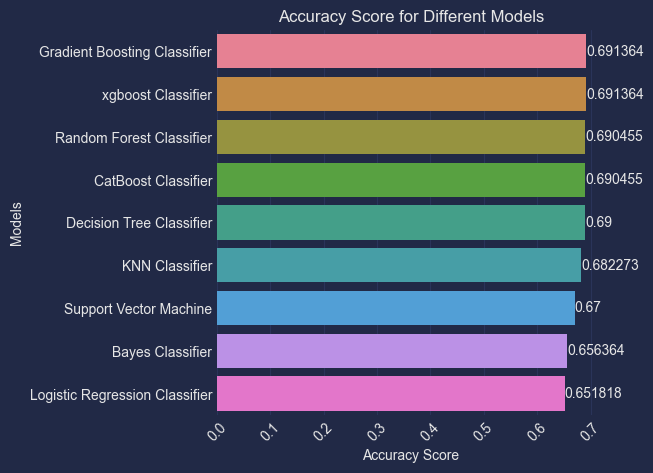

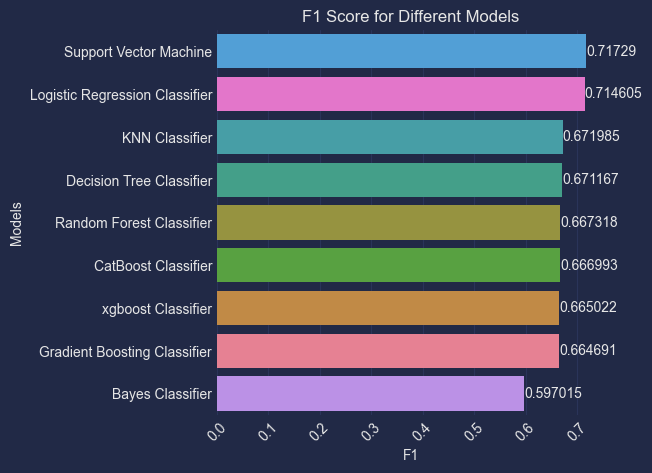

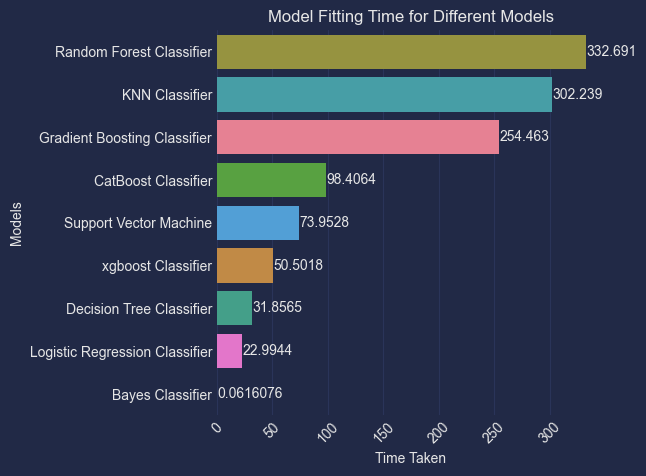

In [35]:
# Plotting Accuracy scores, F1 Scores and Time taken by the models for grid search.
search_plots(fit_models_GS)

### Observations: For grid search on the models.

Gradiant boosting Classifier gives the best result in terms of 'Accuracy Score'. 

Support Vector Machine gives the best result in terms of 'F1 Score'.

Logistic Regression Classfier takes the least amount of time but is one the worst performaing models.

In [1]:
# Function for random search for different models used for classification.

def models_random_search(X_train, X_test, y_train, y_test):

    # we first make a dictionary for the classifiers and a dictionary for the the hyper paramters 

    classifiers = {'Logistic Regression Classifier':LogisticRegressionCV(),
                'KNN Classifier':KNeighborsClassifier(),
                'Decision Tree Classifier':DecisionTreeClassifier(),
                'Random Forest Classifier':RandomForestClassifier(),
                'Support Vector Machine':SVC(),
                'Gradient Boosting Classifier':GradientBoostingClassifier(),
                'xgboost Classifier':XGBClassifier(),
                'CatBoost Classifier' : CatBoostClassifier(logging_level='Silent'),
                'Bayes Classifier': GaussianNB()}

    hyperparmaters = {'Logistic Regression Classifier':{"penalty": ["l1", "l2",'elasticnet'],'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
                'KNN Classifier':{'n_neighbors': [i for i in range(1,250)],  'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']},
                'Decision Tree Classifier':{'max_depth': [1,3,7,9,11,13,15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy']},
                'Random Forest Classifier':{'n_estimators': [25,100,200],'max_depth': [ 5, 10, 20],'min_samples_split': [2, 5, 10, 15],'min_samples_leaf': [1,2,3],'max_features': ['auto', 'sqrt'],},
                'Support Vector Machine':{'C': [0.1,2,5],'kernel': ['poly'],'degree': [2, 3, 4]},
                'Gradient Boosting Classifier':{'n_estimators': [100, 200, 300],'learning_rate': [0.1, 0.01, 0.001],'max_depth': [3, 4, 5]},
                'xgboost Classifier':{'learning_rate': [0.1, 0.01, 0.001],'max_depth': [3, 5, 7],'n_estimators': [100, 200, 300],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]},
                'CatBoost Classifier' : {'learning_rate': [0.1, 0.01, 0.001],'depth': [4, 6, 8],'iterations': [100, 200],'l2_leaf_reg': [1, 3, 5]},
                'Bayes Classifier': {'var_smoothing': [1e-9, 1e-8, 1e-7]}}
    
    # Making a list to store the model accurary rate scores
    Model_acc_score = [] 

    # Making a list to store model precision val
    model_precision_val = []

    # Making a list to store model recall
    model_recall_val = []

    # Making a list to store F1 score
    model_F1_score = []
         
    # Making a index for containing the model names 
    index1 = []

    # Makinf a list for time taken
    time_taken = []
    
    # Making a list to contain the best parameters of the model. 
    best_para = []
    
    for i in classifiers:

        # Starting time stamp
        begin = time.time()
        # Making a model for grid search and to find the best paramters
        rand = RandomizedSearchCV(classifiers[i],hyperparmaters[i],verbose=0) 

        # Fitting the trainning data in the model
        rand.fit(X_train,y_train)

        # Using the best estimator to predict the target variable
        rand_predict = rand.predict(X_test)

        # Ending time stamp
        end = time.time()

        # Getting the required metrics for comparision
        index1.append(i)
        Model_acc_score.append(accuracy_score(y_test,rand_predict))
        model_precision_val.append(precision_score(y_test,rand_predict))
        model_recall_val.append(recall_score(y_test,rand_predict))
        model_F1_score.append(f1_score(y_test,rand_predict))
        best_para.append(rand.best_params_)
        time_taken.append(end-begin)


    
    print('\n')
    table = pd.DataFrame(data = np.array([Model_acc_score,model_precision_val,model_recall_val,model_F1_score,time_taken,best_para]).T,
                         columns = ['Accuracy Score','Precision','Recall','F1','Time Taken','Best Parameters'],index=index1)
    table.index.name = 'Models'
    table_sorted = table.sort_values(by='Accuracy Score', ascending=False)
    print('\n')
    print(f'Total Time taken is {sum(time_taken)} sec')
    return table_sorted

In [2]:
# Calling the function for Random Search.
fit_models_RS = models_random_search(X_train, X_test, y_train, y_test)
fit_models_RS

NameError: name 'X_train' is not defined

In [52]:
fit_models_RS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
xgboost Classifier                   0.691364  0.933518  0.516475  0.665022   
Gradient Boosting Classifier             0.69  0.898848  0.537931  0.673058   
CatBoost Classifier                  0.689545  0.919137  0.522605  0.666341   
Random Forest Classifier             0.688636  0.937853  0.508812  0.659712   
Decision Tree Classifier             0.681364  0.799603  0.617625   0.69693   
KNN Classifier                       0.678182  0.844291   0.56092  0.674033   
Support Vector Machine                   0.67  0.729216  0.705747   0.71729   
Bayes Classifier                     0.656364  0.980736  0.429119  0.597015   
Logistic Regression Classifier       0.635909  0.695652   0.68659  0.691091   

                               Time Taken  \
Models                                      
xgboost Classifier               3.536352   
Gradient Boosting Classifier    76.757579   
CatBoost Classifier             16.578066   
Random Forest Classifier        14.314471   
Decision Tree Classifier         0.152727   
KNN Classifier                   2.943614   
Support Vector Machine          63.919537   
Bayes Classifier                  0.06197   
Logistic Regression Classifier  31.263865   

                                                                  Best Parameters  
Models                                                                             
xgboost Classifier              {'subsample': 0.8, 'n_estimators': 300, 'max_d...  
Gradient Boosting Classifier    {'n_estimators': 300, 'max_depth': 5, 'learnin...  
CatBoost Classifier             {'learning_rate': 0.001, 'l2_leaf_reg': 3, 'it...  
Random Forest Classifier        {'n_estimators': 100, 'min_samples_split': 5, ...  
Decision Tree Classifier        {'min_samples_split': 2, 'min_samples_leaf': 4...  
KNN Classifier                  {'weights': 'distance', 'n_neighbors': 107, 'm...  
Support Vector Machine                  {'kernel': 'poly', 'degree': 2, 'C': 0.1}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier               {'solver': 'lbfgs', 'penalty': 'l2'}

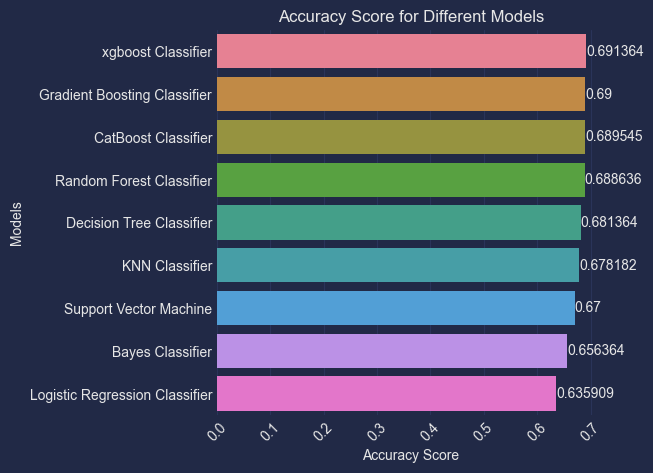

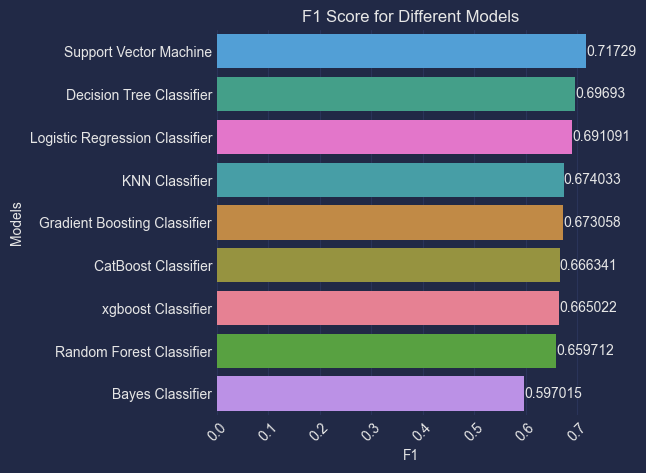

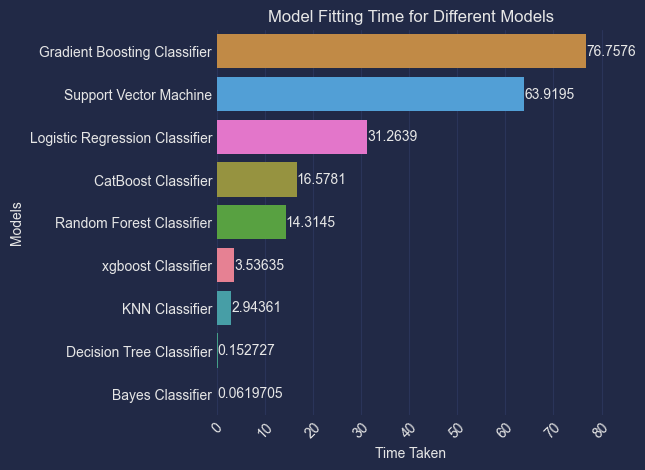

In [38]:
search_plots(fit_models_RS)

## Using Grid Search and Random search on data with selected features using the statistical methods:

1. MI Score : The filtered features are stored in 'key_features_1' variable.
2. f statistic: The filtered features are stored in 'key_features_2' variable.
3. chi2 statistic: The filtered features are stored in 'key_features_3' variable.

### 1. MI Score

Grid Search 

In [39]:
# Grid search for data filtered by key mi score features
fit_models_MI_GS = models_grid_search(X_train[key_features_1], X_test[key_features_1], y_train, y_test)
fit_models_MI_GS

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......penalty=l1, solver=liblinear;, score=0.630 total time=   0.5s
[CV 2/5] END ......penalty=l1, solver=liblinear;, score=0.640 total time=   0.4s
[CV 3/5] END ......penalty=l1, solver=liblinear;, score=0.630 total time=   0.5s
[CV 4/5] END ......penalty=l1, solver=liblinear;, score=0.636 total time=   0.5s
[CV 5/5] END ......penalty=l1, solver=liblinear;, score=0.662 total time=   0.5s
[CV 1/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ........penalty=l1, solver=newton-c

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.641 total time=   0.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.616 total time=   0.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.635 total time=   0.3s
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.648 total time=   0.3s
[CV 1/5] END ......penalty=l2, solver=liblinear;, score=0.629 total time=   0.4s
[CV 2/5] END ......penalty=l2, solver=liblinear;, score=0.649 total time=   0.4s
[CV 3/5] END ......penalty=l2, solver=liblinear;, score=0.624 total time=   0.4s
[CV 4/5] END ......penalty=l2, solver=liblinear;, score=0.640 total time=   0.5s
[CV 5/5] END ......penalty=l2, solver=liblinear;, score=0.644 total time=   0.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.628 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.649 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.626 total time=   1.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.634 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search f

[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.655 total time=   1.4s
[CV 1/5] END penalty=l2, solver=newton-cholesky;, score=0.628 total time=   0.0s
[CV 2/5] END penalty=l2, solver=newton-cholesky;, score=0.649 total time=   0.0s
[CV 3/5] END penalty=l2, solver=newton-cholesky;, score=0.626 total time=   0.0s
[CV 4/5] END penalty=l2, solver=newton-cholesky;, score=0.634 total time=   0.0s
[CV 5/5] END penalty=l2, solver=newton-cholesky;, score=0.655 total time=   0.0s
[CV 1/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END penalty=elastic

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tanay\AppData

Fitting 5 folds for each of 996 candidates, totalling 4980 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.639 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.640 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.661 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.644 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.670 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.639 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.640 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.661 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.644 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.670 

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1710 fits failed out of a total of 5130.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1710 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=3, 

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.655 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.663 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.656 total time=   0.9s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.647 total time=   0.9s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.672 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.637 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.642 total time=   1.0s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.641 total time=   0.9s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.632 total time=   0.9s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.660 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.635 total time=   1.0s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.636 total time=   1.0s
[CV 3/5] END ......C=0.1, de

Accuracy Score Precision    Recall        F1  \
Models                                                                        
KNN Classifier                       0.690909  0.878788  0.555556  0.680751   
Gradient Boosting Classifier         0.690909  0.928669  0.518774  0.665683   
CatBoost Classifier                  0.687273  0.893997  0.536398  0.670498   
xgboost Classifier                   0.685909  0.908245  0.523372  0.664074   
Random Forest Classifier             0.683636  0.871795  0.547126  0.672316   
Support Vector Machine                   0.67  0.729216  0.705747   0.71729   
Bayes Classifier                     0.654091  0.972222  0.429119  0.595428   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   
Decision Tree Classifier                0.645  0.836761  0.498851   0.62506   

                                Time Taken  \
Models                                       
KNN Classifier                  262.869339   
Gradient Boosting Classifier    185.701211   
CatBoost Classifier               96.46684   
xgboost Classifier               50.270478   
Random Forest Classifier         278.41888   
Support Vector Machine           60.485275   
Bayes Classifier                  0.055606   
Logistic Regression Classifier   15.743178   
Decision Tree Classifier         28.509522   

                                                                  Best Parameters  
Models                                                                             
KNN Classifier                  {'metric': 'manhattan', 'n_neighbors': 84, 'we...  
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 4, 'n_est...  
CatBoost Classifier             {'depth': 8, 'iterations': 200, 'l2_leaf_reg':...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
Support Vector Machine                  {'C': 0.1, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-08}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}  
Decision Tree Classifier        {'criterion': 'entropy', 'max_depth': 6, 'max_...

In [53]:
fit_models_MI_GS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
KNN Classifier                       0.690909  0.878788  0.555556  0.680751   
Gradient Boosting Classifier         0.690909  0.928669  0.518774  0.665683   
CatBoost Classifier                  0.687273  0.893997  0.536398  0.670498   
xgboost Classifier                   0.685909  0.908245  0.523372  0.664074   
Random Forest Classifier             0.683636  0.871795  0.547126  0.672316   
Support Vector Machine                   0.67  0.729216  0.705747   0.71729   
Bayes Classifier                     0.654091  0.972222  0.429119  0.595428   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   
Decision Tree Classifier                0.645  0.836761  0.498851   0.62506   

                                Time Taken  \
Models                                       
KNN Classifier                  262.869339   
Gradient Boosting Classifier    185.701211   
CatBoost Classifier               96.46684   
xgboost Classifier               50.270478   
Random Forest Classifier         278.41888   
Support Vector Machine           60.485275   
Bayes Classifier                  0.055606   
Logistic Regression Classifier   15.743178   
Decision Tree Classifier         28.509522   

                                                                  Best Parameters  
Models                                                                             
KNN Classifier                  {'metric': 'manhattan', 'n_neighbors': 84, 'we...  
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 4, 'n_est...  
CatBoost Classifier             {'depth': 8, 'iterations': 200, 'l2_leaf_reg':...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
Support Vector Machine                  {'C': 0.1, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-08}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}  
Decision Tree Classifier        {'criterion': 'entropy', 'max_depth': 6, 'max_...

Model performance in grid search using MI score selected features.

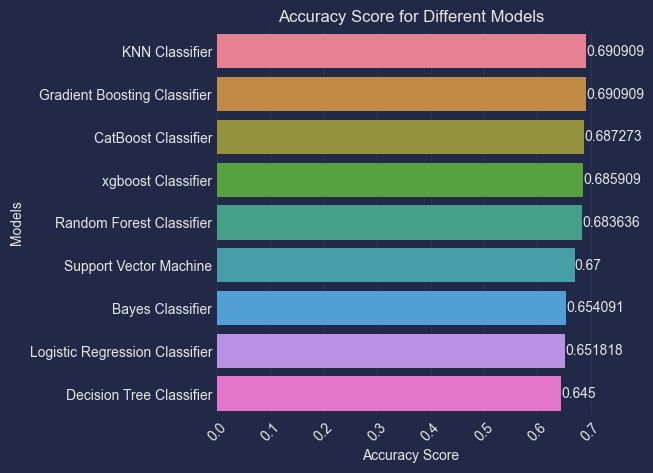

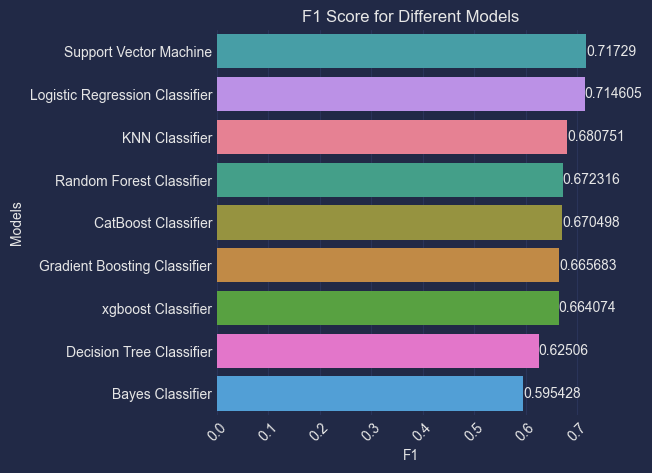

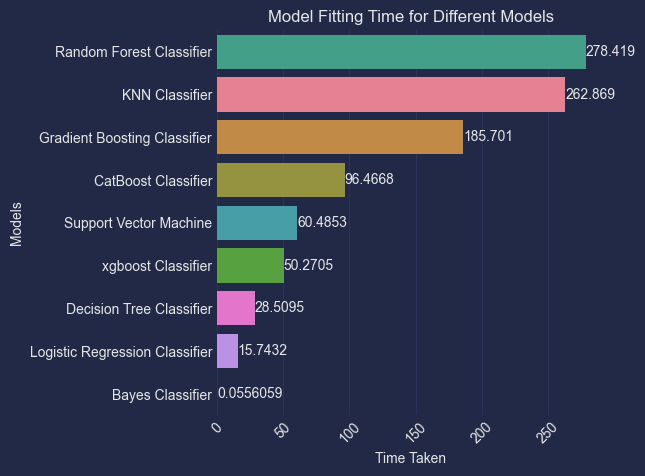

In [40]:
search_plots(fit_models_MI_GS)

Random Search

In [41]:
# Random search for data filtered by key mi score features
fit_models_MI_RS = models_random_search(X_train[key_features_1], X_test[key_features_1], y_train, y_test)
fit_models_MI_RS

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END penalty=l2, solver=newton-cholesky;, score=0.628 total time=   0.0s
[CV 2/5] END penalty=l2, solver=newton-cholesky;, score=0.649 total time=   0.0s
[CV 3/5] END penalty=l2, solver=newton-cholesky;, score=0.626 total time=   0.0s
[CV 4/5] END penalty=l2, solver=newton-cholesky;, score=0.634 total time=   0.0s
[CV 5/5] END penalty=l2, solver=newton-cholesky;, score=0.655 total time=   0.0s
[CV 1/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....penalty=elasticnet, solver=lbfg

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 1/5] END ............penalty=l2, solver=sag;, score=0.628 total time=   2.0s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 2/5] END ............penalty=l2, solver=sag;, score=0.639 total time=   2.1s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 3/5] END ............penalty=l2, solver=sag;, score=0.614 total time=   2.1s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 4/5] END ............penalty=l2, solver=sag;, score=0.641 total time=   2.1s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 5/5] END ............penalty=l2, solver=sag;, score=0.650 total time=   2.1s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 1/5] END ...........penalty=l2, solver=saga;, score=0.651 total time=   2.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 2/5] END ...........penalty=l2, solver=saga;, score=0.644 total time=   2.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 3/5] END ...........penalty=l2, solver=saga;, score=0.631 total time=   2.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 4/5] END ...........penalty=l2, solver=saga;, score=0.642 total time=   2.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 5/5] END ...........penalty=l2, solver=saga;, score=0.660 total time=   2.2s
[CV 1/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END ..........penalty=l2, solver=lbfgs;, score=0.625 total time=   0.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.641 total time=   0.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.616 total time=   0.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.635 total time=   0.3s
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.648 total time=   0.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 1/5] END ...........penalty=l1, solver=saga;, score=0.649 total time=   2.7s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 2/5] END ...........penalty=l1, solver=saga;, score=0.643 total time=   2.7s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 3/5] END ...........penalty=l1, solver=saga;, score=0.628 total time=   2.7s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 4/5] END ...........penalty=l1, solver=saga;, score=0.640 total time=   2.7s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 5/5] END ...........penalty=l1, solver=saga;, score=0.661 total time=   2.6s
[CV 1/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.628 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.649 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.626 total time=   1.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.634 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search f

[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.655 total time=   1.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tanay\AppData

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=manhattan, n_neighbors=181, weights=distance;, score=0.674 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=181, weights=distance;, score=0.688 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=181, weights=distance;, score=0.671 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=181, weights=distance;, score=0.664 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=181, weights=distance;, score=0.689 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=87, weights=distance;, score=0.678 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=87, weights=distance;, score=0.677 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=87, weights=distance;, score=0.668 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=87, weights=distance;, score=0.659 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=87, weights=distan

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.664 total time=   1.3s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.669 total time=   1.3s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.654 total time=   1.4s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.642 total time=   1.4s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.655 total time=   1.3s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.688 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.685 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=sqrt

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.655 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.663 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.656 total time=   0.9s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.647 total time=   0.9s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.672 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.637 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.642 total time=   1.0s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.641 total time=   1.0s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.632 total time=   0.9s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.660 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.635 total time=   1.0s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;,

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy Score Precision    Recall        F1  \
Models                                                                        
Decision Tree Classifier             0.692273  0.932507  0.518774  0.666667   
Gradient Boosting Classifier         0.685909  0.875306  0.548659  0.674517   
CatBoost Classifier                  0.684545  0.878563  0.543295  0.671402   
KNN Classifier                       0.684091  0.869249  0.550192  0.673862   
Random Forest Classifier             0.683182  0.878109  0.540996  0.669512   
xgboost Classifier                   0.681364   0.84633  0.565517  0.677997   
Support Vector Machine                   0.67  0.729216  0.705747   0.71729   
Bayes Classifier                     0.654091  0.972222  0.429119  0.595428   
Logistic Regression Classifier       0.647727  0.700758  0.708812  0.704762   

                               Time Taken  \
Models                                      
Decision Tree Classifier         0.236405   
Gradient Boosting Classifier    66.090238   
CatBoost Classifier             18.446074   
KNN Classifier                   2.198597   
Random Forest Classifier        24.739187   
xgboost Classifier               3.914438   
Support Vector Machine          59.474552   
Bayes Classifier                 0.062338   
Logistic Regression Classifier  49.000421   

                                                                  Best Parameters  
Models                                                                             
Decision Tree Classifier        {'min_samples_split': 10, 'min_samples_leaf': ...  
Gradient Boosting Classifier    {'n_estimators': 100, 'max_depth': 3, 'learnin...  
CatBoost Classifier             {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'ite...  
KNN Classifier                  {'weights': 'distance', 'n_neighbors': 181, 'm...  
Random Forest Classifier        {'n_estimators': 200, 'min_samples_split': 5, ...  
xgboost Classifier              {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
Support Vector Machine                  {'kernel': 'poly', 'degree': 2, 'C': 0.1}  
Bayes Classifier                                         {'var_smoothing': 1e-08}  
Logistic Regression Classifier                {'solver': 'saga', 'penalty': 'l2'}

In [54]:
fit_models_MI_RS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Decision Tree Classifier             0.692273  0.932507  0.518774  0.666667   
Gradient Boosting Classifier         0.685909  0.875306  0.548659  0.674517   
CatBoost Classifier                  0.684545  0.878563  0.543295  0.671402   
KNN Classifier                       0.684091  0.869249  0.550192  0.673862   
Random Forest Classifier             0.683182  0.878109  0.540996  0.669512   
xgboost Classifier                   0.681364   0.84633  0.565517  0.677997   
Support Vector Machine                   0.67  0.729216  0.705747   0.71729   
Bayes Classifier                     0.654091  0.972222  0.429119  0.595428   
Logistic Regression Classifier       0.647727  0.700758  0.708812  0.704762   

                               Time Taken  \
Models                                      
Decision Tree Classifier         0.236405   
Gradient Boosting Classifier    66.090238   
CatBoost Classifier             18.446074   
KNN Classifier                   2.198597   
Random Forest Classifier        24.739187   
xgboost Classifier               3.914438   
Support Vector Machine          59.474552   
Bayes Classifier                 0.062338   
Logistic Regression Classifier  49.000421   

                                                                  Best Parameters  
Models                                                                             
Decision Tree Classifier        {'min_samples_split': 10, 'min_samples_leaf': ...  
Gradient Boosting Classifier    {'n_estimators': 100, 'max_depth': 3, 'learnin...  
CatBoost Classifier             {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'ite...  
KNN Classifier                  {'weights': 'distance', 'n_neighbors': 181, 'm...  
Random Forest Classifier        {'n_estimators': 200, 'min_samples_split': 5, ...  
xgboost Classifier              {'subsample': 0.8, 'n_estimators': 200, 'max_d...  
Support Vector Machine                  {'kernel': 'poly', 'degree': 2, 'C': 0.1}  
Bayes Classifier                                         {'var_smoothing': 1e-08}  
Logistic Regression Classifier                {'solver': 'saga', 'penalty': 'l2'}

Model performance in random search using MI score selected features.

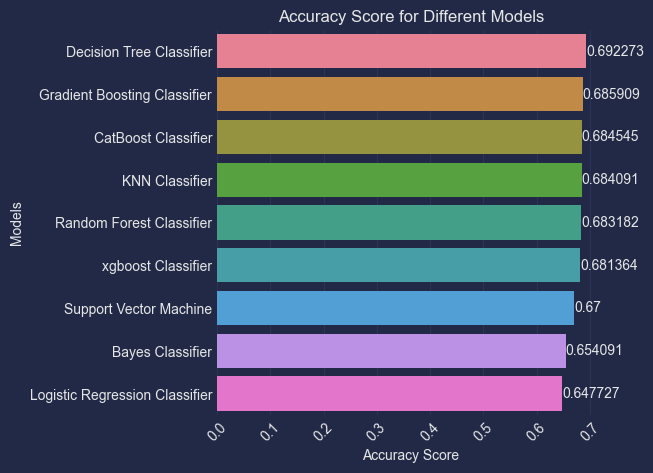

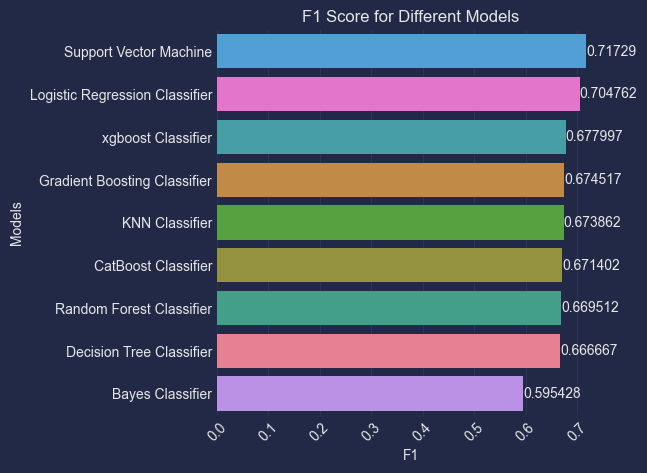

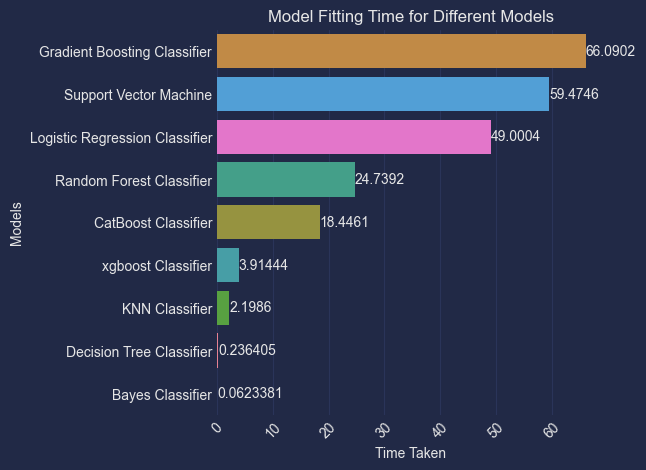

In [42]:
search_plots(fit_models_MI_RS)

### 2. f-Statistic

Grid Search

In [43]:
# Grid search for data filtered by key f-statistic score features
fit_models_F_GS = models_grid_search(X_train[key_features_2], X_test[key_features_2], y_train, y_test)
fit_models_F_GS

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......penalty=l1, solver=liblinear;, score=0.629 total time=   0.5s
[CV 2/5] END ......penalty=l1, solver=liblinear;, score=0.640 total time=   0.5s
[CV 3/5] END ......penalty=l1, solver=liblinear;, score=0.630 total time=   0.5s
[CV 4/5] END ......penalty=l1, solver=liblinear;, score=0.636 total time=   0.5s
[CV 5/5] END ......penalty=l1, solver=liblinear;, score=0.662 total time=   0.4s
[CV 1/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ........penalty=l1, solver=newton-c

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.622 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.653 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.624 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.632 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.651 total time=   1.2s
[CV 1/5] END penalty=l2, solver=newton-cholesky;, score=0.622 total time=   0.0s
[CV 2/5] END penalty=l2, solver=newton-cholesky;, score=0.653 total time=   0.0s
[CV 3/5] END penalty=l2, solver=newton-cholesky;, score=0.624 total time=   0.0s
[CV 4/5] END penalty=l2, solver=newton-cholesky;, score=0.632 total time=   0.0s
[CV 5/5] END penalty=l2, solver=newton-cholesky;, score=0.651 total time=   0.0s
[CV 1/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END penalty=elastic

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tanay\AppData

Fitting 5 folds for each of 996 candidates, totalling 4980 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.649 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.657 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.662 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.649 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.657 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.662 

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1710 fits failed out of a total of 5130.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1710 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, min_sample

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.653 total time=   0.8s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.662 total time=   0.8s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.656 total time=   0.8s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.645 total time=   0.8s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.671 total time=   0.8s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.639 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.644 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.643 total time=   0.8s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.634 total time=   0.8s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.661 total time=   0.8s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.635 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.637 total time=   1.0s
[CV 3/5] END ......C=0.1, de

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Gradient Boosting Classifier         0.691818  0.930041   0.51954  0.666667   
Random Forest Classifier             0.690455  0.920485  0.523372  0.667318   
CatBoost Classifier                      0.69  0.924966   0.51954  0.665358   
xgboost Classifier                   0.689091  0.928276  0.515709  0.663054   
Decision Tree Classifier             0.687273  0.922025  0.516475  0.662083   
KNN Classifier                       0.685455  0.861865  0.559387  0.678439   
Support Vector Machine               0.669091  0.733226  0.695019  0.713611   
Bayes Classifier                     0.654091  0.978873  0.426054    0.5937   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   

                                Time Taken  \
Models                                       
Gradient Boosting Classifier    178.437958   
Random Forest Classifier         303.12318   
CatBoost Classifier              99.328806   
xgboost Classifier               47.557438   
Decision Tree Classifier          28.27311   
KNN Classifier                  252.101858   
Support Vector Machine           57.594334   
Bayes Classifier                  0.048804   
Logistic Regression Classifier   15.118221   

                                                                  Best Parameters  
Models                                                                             
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
CatBoost Classifier             {'depth': 6, 'iterations': 200, 'l2_leaf_reg':...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
Decision Tree Classifier        {'criterion': 'gini', 'max_depth': 5, 'max_fea...  
KNN Classifier                  {'metric': 'euclidean', 'n_neighbors': 94, 'we...  
Support Vector Machine                    {'C': 5, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}

In [55]:
fit_models_F_GS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Gradient Boosting Classifier         0.691818  0.930041   0.51954  0.666667   
Random Forest Classifier             0.690455  0.920485  0.523372  0.667318   
CatBoost Classifier                      0.69  0.924966   0.51954  0.665358   
xgboost Classifier                   0.689091  0.928276  0.515709  0.663054   
Decision Tree Classifier             0.687273  0.922025  0.516475  0.662083   
KNN Classifier                       0.685455  0.861865  0.559387  0.678439   
Support Vector Machine               0.669091  0.733226  0.695019  0.713611   
Bayes Classifier                     0.654091  0.978873  0.426054    0.5937   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   

                                Time Taken  \
Models                                       
Gradient Boosting Classifier    178.437958   
Random Forest Classifier         303.12318   
CatBoost Classifier              99.328806   
xgboost Classifier               47.557438   
Decision Tree Classifier          28.27311   
KNN Classifier                  252.101858   
Support Vector Machine           57.594334   
Bayes Classifier                  0.048804   
Logistic Regression Classifier   15.118221   

                                                                  Best Parameters  
Models                                                                             
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
CatBoost Classifier             {'depth': 6, 'iterations': 200, 'l2_leaf_reg':...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
Decision Tree Classifier        {'criterion': 'gini', 'max_depth': 5, 'max_fea...  
KNN Classifier                  {'metric': 'euclidean', 'n_neighbors': 94, 'we...  
Support Vector Machine                    {'C': 5, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}

Visualizing Model performance in grid search using f-statistic selected features.

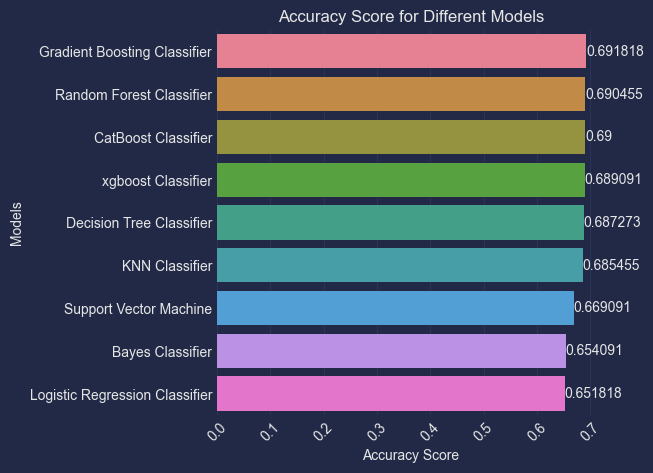

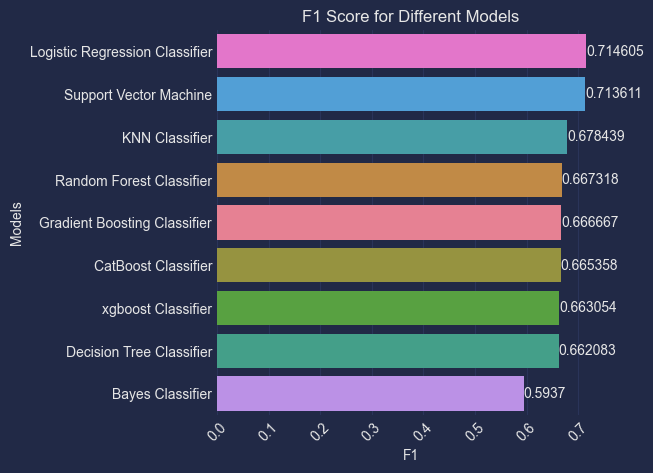

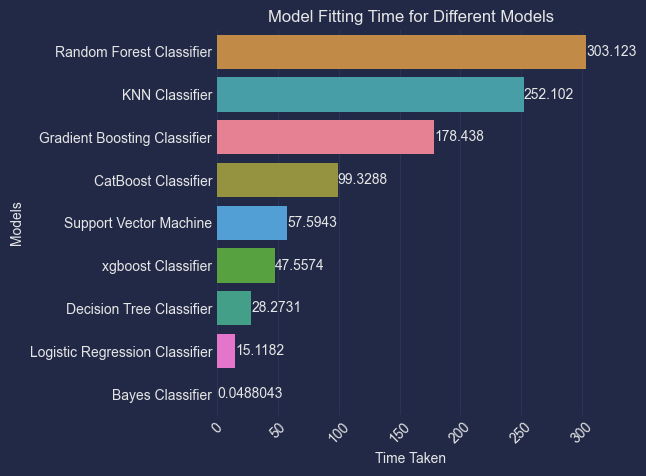

In [44]:
search_plots(fit_models_F_GS)

Random Search

In [45]:
# Random search for data filtered by key f-statistic score features
fit_models_F_RS = models_random_search(X_train[key_features_2], X_test[key_features_2], y_train, y_test)
fit_models_F_RS

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .....

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 1/5] END ...........penalty=l1, solver=saga;, score=0.649 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 2/5] END ...........penalty=l1, solver=saga;, score=0.644 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 3/5] END ...........penalty=l1, solver=saga;, score=0.628 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 4/5] END ...........penalty=l1, solver=saga;, score=0.640 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 5/5] END ...........penalty=l1, solver=saga;, score=0.661 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.622 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.653 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.624 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.632 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.651 total time=   1.2s
[CV 1/5] END penalty=l2, solver=newton-cholesky;, score=0.622 total time=   0.0s
[CV 2/5] END penalty=l2, solver=newton-cholesky;, score=0.653 total time=   0.0s
[CV 3/5] END penalty=l2, solver=newton-cholesky;, score=0.624 total time=   0.0s
[CV 4/5] END penalty=l2, solver=newton-cholesky;, score=0.632 total time=   0.0s
[CV 5/5] END penalty=l2, solver=newton-cholesky;, score=0.651 total time=   0.0s
[CV 1/5] END ......penalty=l2, solver=liblinear;, score=0.632 total time=   0.3s
[CV 2/5] END ......penalty=l2, solver=liblinear;, score=0.653 total time=   0.4s
[CV 3/5] END ......penalty=l2, solver=liblinear;, score=0.616 total time=   0.3s
[CV 4/5] END ......penalty=l2, solver=liblinear;, score=0.630 total time=   0.4s
[CV 5/5] END ......penalty=l2, solver=liblinear;, score=0.640 total time=   0.3s
[CV 1/5] END penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END penalty=elastic

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tanay\AppData

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=manhattan, n_neighbors=53, weights=uniform;, score=0.670 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=53, weights=uniform;, score=0.670 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=53, weights=uniform;, score=0.662 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=53, weights=uniform;, score=0.651 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=53, weights=uniform;, score=0.678 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=41, weights=distance;, score=0.669 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=41, weights=distance;, score=0.665 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=41, weights=distance;, score=0.666 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=41, weights=distance;, score=0.666 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=41, weights=distance;, score

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.688 total time=   0.5s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.691 total time=   0.5s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.677 total time=   0.5s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.665 total time=   0.5s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.692 total time=   0.5s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.665 total time=   0.8s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.657 total time=   0.8s
[CV 3/5] END max_depth=20, max_features=s

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.653 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.662 total time=   0.8s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.656 total time=   0.8s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.645 total time=   0.8s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.671 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.639 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.644 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.643 total time=   0.9s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.634 total time=   0.8s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.661 total time=   0.8s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.635 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;,

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy Score Precision    Recall        F1  \
Models                                                                        
Gradient Boosting Classifier         0.691818  0.930041   0.51954  0.666667   
CatBoost Classifier                  0.690909   0.92633  0.520307   0.66634   
Random Forest Classifier             0.690455  0.930939  0.516475  0.664367   
xgboost Classifier                   0.688636  0.883663  0.547126  0.675816   
KNN Classifier                       0.687273  0.859977  0.564751  0.681776   
Decision Tree Classifier                 0.68  0.843429  0.565517  0.677064   
Support Vector Machine               0.669091  0.733226  0.695019  0.713611   
Bayes Classifier                     0.654091  0.978873  0.426054    0.5937   
Logistic Regression Classifier       0.647273  0.699322  0.711111  0.705167   

                               Time Taken  \
Models                                      
Gradient Boosting Classifier    68.477417   
CatBoost Classifier             17.609312   
Random Forest Classifier        17.562152   
xgboost Classifier               4.045789   
KNN Classifier                   2.257071   
Decision Tree Classifier         0.285803   
Support Vector Machine          58.115716   
Bayes Classifier                 0.048682   
Logistic Regression Classifier   28.24474   

                                                                  Best Parameters  
Models                                                                             
Gradient Boosting Classifier    {'n_estimators': 200, 'max_depth': 3, 'learnin...  
CatBoost Classifier             {'learning_rate': 0.001, 'l2_leaf_reg': 5, 'it...  
Random Forest Classifier        {'n_estimators': 100, 'min_samples_split': 5, ...  
xgboost Classifier              {'subsample': 0.8, 'n_estimators': 100, 'max_d...  
KNN Classifier                  {'weights': 'uniform', 'n_neighbors': 87, 'met...  
Decision Tree Classifier        {'min_samples_split': 5, 'min_samples_leaf': 4...  
Support Vector Machine                    {'kernel': 'poly', 'degree': 2, 'C': 5}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier                {'solver': 'saga', 'penalty': 'l1'}

In [56]:
fit_models_F_RS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Gradient Boosting Classifier         0.691818  0.930041   0.51954  0.666667   
CatBoost Classifier                  0.690909   0.92633  0.520307   0.66634   
Random Forest Classifier             0.690455  0.930939  0.516475  0.664367   
xgboost Classifier                   0.688636  0.883663  0.547126  0.675816   
KNN Classifier                       0.687273  0.859977  0.564751  0.681776   
Decision Tree Classifier                 0.68  0.843429  0.565517  0.677064   
Support Vector Machine               0.669091  0.733226  0.695019  0.713611   
Bayes Classifier                     0.654091  0.978873  0.426054    0.5937   
Logistic Regression Classifier       0.647273  0.699322  0.711111  0.705167   

                               Time Taken  \
Models                                      
Gradient Boosting Classifier    68.477417   
CatBoost Classifier             17.609312   
Random Forest Classifier        17.562152   
xgboost Classifier               4.045789   
KNN Classifier                   2.257071   
Decision Tree Classifier         0.285803   
Support Vector Machine          58.115716   
Bayes Classifier                 0.048682   
Logistic Regression Classifier   28.24474   

                                                                  Best Parameters  
Models                                                                             
Gradient Boosting Classifier    {'n_estimators': 200, 'max_depth': 3, 'learnin...  
CatBoost Classifier             {'learning_rate': 0.001, 'l2_leaf_reg': 5, 'it...  
Random Forest Classifier        {'n_estimators': 100, 'min_samples_split': 5, ...  
xgboost Classifier              {'subsample': 0.8, 'n_estimators': 100, 'max_d...  
KNN Classifier                  {'weights': 'uniform', 'n_neighbors': 87, 'met...  
Decision Tree Classifier        {'min_samples_split': 5, 'min_samples_leaf': 4...  
Support Vector Machine                    {'kernel': 'poly', 'degree': 2, 'C': 5}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier                {'solver': 'saga', 'penalty': 'l1'}

Visualizing Model performance in random search using f-statistic selected features.

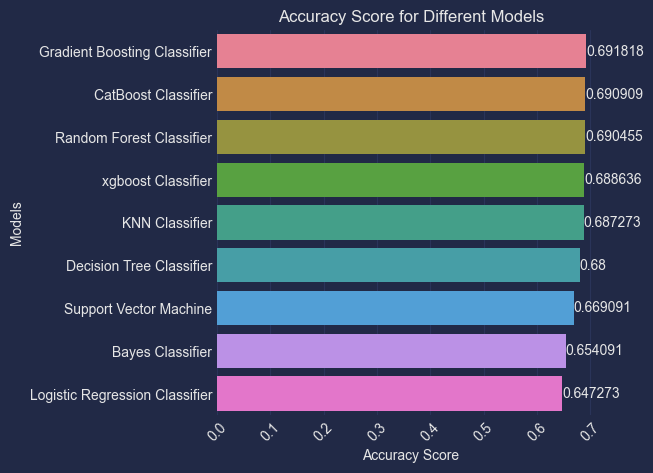

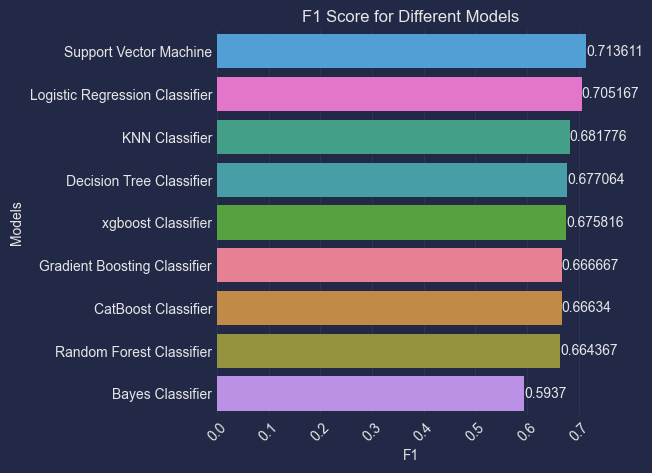

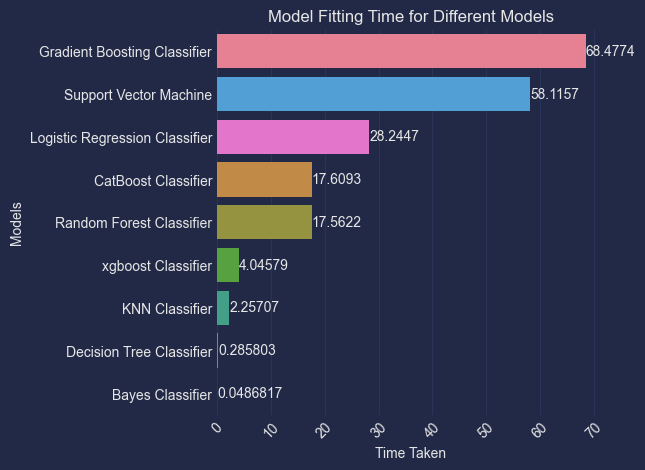

In [46]:
search_plots(fit_models_F_RS)

### 3. Chi2 statistic 

Grid Search

In [47]:
# Grid search for data filtered by key Chi2 statistic score features
fit_models_chi2_GS = models_grid_search(X_train[key_features_3], X_test[key_features_3], y_train, y_test)
fit_models_chi2_GS

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ............penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......penalty=l1, solver=liblinear;, score=0.631 total time=   0.4s
[CV 2/5] END ......penalty=l1, solver=liblinear;, score=0.640 total time=   0.4s
[CV 3/5] END ......penalty=l1, solver=liblinear;, score=0.630 total time=   0.4s
[CV 4/5] END ......penalty=l1, solver=liblinear;, score=0.636 total time=   0.4s
[CV 5/5] END ......penalty=l1, solver=liblinear;, score=0.662 total time=   0.4s
[CV 1/5] END ........penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ........penalty=l1, solver=newton-c

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..........penalty=l2, solver=lbfgs;, score=0.623 total time=   0.2s
[CV 2/5] END ..........penalty=l2, solver=lbfgs;, score=0.641 total time=   0.2s
[CV 3/5] END ..........penalty=l2, solver=lbfgs;, score=0.613 total time=   0.3s
[CV 4/5] END ..........penalty=l2, solver=lbfgs;, score=0.633 total time=   0.2s
[CV 5/5] END ..........penalty=l2, solver=lbfgs;, score=0.650 total time=   0.2s
[CV 1/5] END ......penalty=l2, solver=liblinear;, score=0.632 total time=   0.4s
[CV 2/5] END ......penalty=l2, solver=liblinear;, score=0.657 total time=   0.4s
[CV 3/5] END ......penalty=l2, solver=liblinear;, score=0.616 total time=   0.3s
[CV 4/5] END ......penalty=l2, solver=liblinear;, score=0.630 total time=   0.4s
[CV 5/5] END ......penalty=l2, solver=liblinear;, score=0.640 total time=   0.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 1/5] END ......penalty=l2, solver=newton-cg;, score=0.622 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did

[CV 2/5] END ......penalty=l2, solver=newton-cg;, score=0.653 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END ......penalty=l2, solver=newton-cg;, score=0.624 total time=   1.2s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 4/5] END ......penalty=l2, solver=newton-cg;, score=0.632 total time=   1.3s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search

[CV 5/5] END ......penalty=l2, solver=newton-cg;, score=0.651 total time=   1.2s
[CV 1/5] END penalty=l2, solver=newton-cholesky;, score=0.622 total time=   0.0s
[CV 2/5] END penalty=l2, solver=newton-cholesky;, score=0.653 total time=   0.0s
[CV 3/5] END penalty=l2, solver=newton-cholesky;, score=0.624 total time=   0.0s
[CV 4/5] END penalty=l2, solver=newton-cholesky;, score=0.632 total time=   0.0s
[CV 5/5] END penalty=l2, solver=newton-cholesky;, score=0.651 total time=   0.0s
[CV 1/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END penalty=elastic

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tanay\AppData

Fitting 5 folds for each of 996 candidates, totalling 4980 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.649 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.657 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.662 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.644 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.649 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.657 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.643 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.662 

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1710 fits failed out of a total of 5130.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1710 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\b

[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.687 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.693 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.681 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.664 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.691 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.689 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.694 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samp

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.653 total time=   0.8s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.662 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.656 total time=   0.9s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.645 total time=   0.9s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.671 total time=   0.8s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.639 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.644 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.643 total time=   0.8s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.634 total time=   0.8s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.661 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.635 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.637 total time=   1.0s
[CV 3/5] END ......C=0.1, de

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Random Forest Classifier             0.693636  0.925776   0.52567  0.670577   
Gradient Boosting Classifier         0.691818  0.930041   0.51954  0.666667   
xgboost Classifier                       0.69  0.928473  0.517241   0.66437   
CatBoost Classifier                  0.689091  0.921303  0.520307  0.665034   
KNN Classifier                       0.685455  0.861865  0.559387  0.678439   
Decision Tree Classifier                0.675  0.944277   0.48046  0.636872   
Support Vector Machine               0.669091  0.733226  0.695019  0.713611   
Bayes Classifier                     0.654091  0.978873  0.426054    0.5937   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   

                                Time Taken  \
Models                                       
Random Forest Classifier        301.964336   
Gradient Boosting Classifier    181.170252   
xgboost Classifier               46.499395   
CatBoost Classifier               95.86931   
KNN Classifier                  245.803331   
Decision Tree Classifier         27.850992   
Support Vector Machine           61.811441   
Bayes Classifier                  0.046358   
Logistic Regression Classifier   14.669488   

                                                                  Best Parameters  
Models                                                                             
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
CatBoost Classifier             {'depth': 6, 'iterations': 100, 'l2_leaf_reg':...  
KNN Classifier                  {'metric': 'euclidean', 'n_neighbors': 94, 'we...  
Decision Tree Classifier        {'criterion': 'entropy', 'max_depth': 4, 'max_...  
Support Vector Machine                    {'C': 5, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}

In [57]:
fit_models_chi2_GS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Random Forest Classifier             0.693636  0.925776   0.52567  0.670577   
Gradient Boosting Classifier         0.691818  0.930041   0.51954  0.666667   
xgboost Classifier                       0.69  0.928473  0.517241   0.66437   
CatBoost Classifier                  0.689091  0.921303  0.520307  0.665034   
KNN Classifier                       0.685455  0.861865  0.559387  0.678439   
Decision Tree Classifier                0.675  0.944277   0.48046  0.636872   
Support Vector Machine               0.669091  0.733226  0.695019  0.713611   
Bayes Classifier                     0.654091  0.978873  0.426054    0.5937   
Logistic Regression Classifier       0.651818  0.695431  0.734866  0.714605   

                                Time Taken  \
Models                                       
Random Forest Classifier        301.964336   
Gradient Boosting Classifier    181.170252   
xgboost Classifier               46.499395   
CatBoost Classifier               95.86931   
KNN Classifier                  245.803331   
Decision Tree Classifier         27.850992   
Support Vector Machine           61.811441   
Bayes Classifier                  0.046358   
Logistic Regression Classifier   14.669488   

                                                                  Best Parameters  
Models                                                                             
Random Forest Classifier        {'max_depth': 5, 'max_features': 'sqrt', 'min_...  
Gradient Boosting Classifier    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
xgboost Classifier              {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
CatBoost Classifier             {'depth': 6, 'iterations': 100, 'l2_leaf_reg':...  
KNN Classifier                  {'metric': 'euclidean', 'n_neighbors': 94, 'we...  
Decision Tree Classifier        {'criterion': 'entropy', 'max_depth': 4, 'max_...  
Support Vector Machine                    {'C': 5, 'degree': 2, 'kernel': 'poly'}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier           {'penalty': 'l1', 'solver': 'liblinear'}

Visualizing model performance in grid search using chi2-statistic selected features.

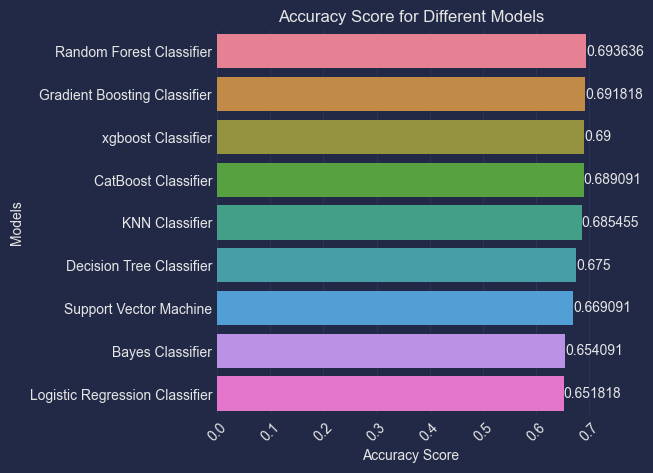

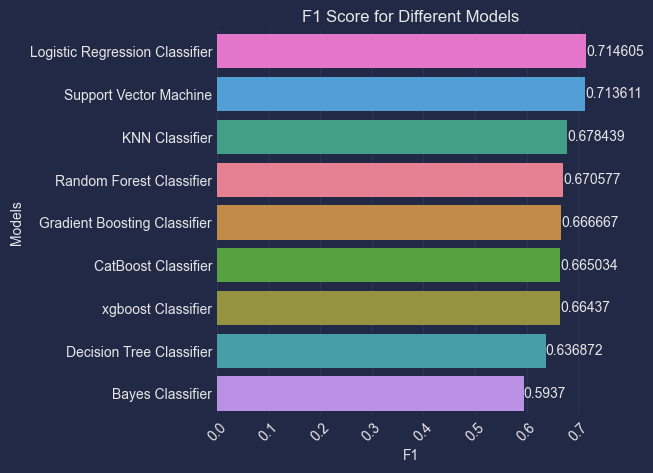

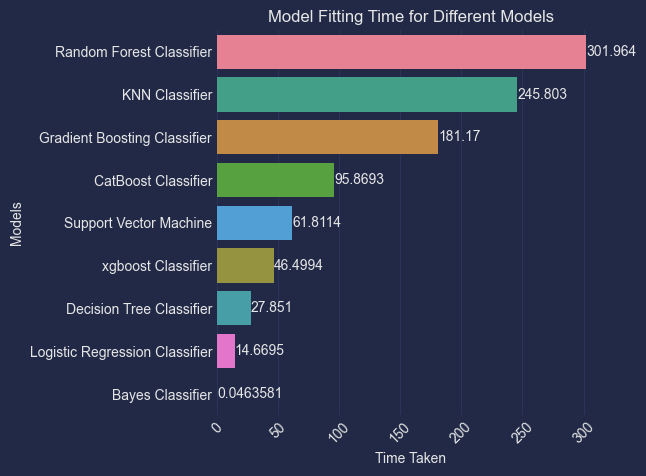

In [48]:
search_plots(fit_models_chi2_GS)

Random Search 

In [49]:
# Random search for data filtered by key Chi2 statistic score features
fit_models_chi2_RS = models_random_search(X_train[key_features_3], X_test[key_features_3], y_train, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 1/5] END ...........penalty=l2, solver=saga;, score=0.652 total time=   2.0s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 2/5] END ...........penalty=l2, solver=saga;, score=0.645 total time=   2.0s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 3/5] END ...........penalty=l2, solver=saga;, score=0.617 total time=   2.0s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 4/5] END ...........penalty=l2, solver=saga;, score=0.643 total time=   2.0s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 5/5] END ...........penalty=l2, solver=saga;, score=0.661 total time=   2.0s
[CV 1/5] END ......penalty=l1, solver=liblinear;, score=0.629 total time=   0.5s
[CV 2/5] END ......penalty=l1, solver=liblinear;, score=0.640 total time=   0.4s
[CV 3/5] END ......penalty=l1, solver=liblinear;, score=0.630 total time=   0.4s
[CV 4/5] END ......penalty=l1, solver=liblinear;, score=0.636 total time=   0.5s
[CV 5/5] END ......penalty=l1, solver=liblinear;, score=0.662 total time=   0.4s
[CV 1/5] END penalty=l2, solver=newton-cholesky;, score=0.622 total time=   0.0s
[CV 2/5] END penalty=l2, solver=newton-cholesky;, score=0.653 total time=   0.0s
[CV 3/5] END penalty=l2, solver=newton-cholesky;, score=0.624 total time=   0.0s
[CV 4/5] END penalty=l2, solver=newton-cholesky;, score=0.632 total time=   0.0s
[CV 5/5] END penalty=l2, solver=newton-cholesky;, score=0.651 total time=   0.0s
[CV 1/5] END .....penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END .....penalty=el

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 1/5] END ...........penalty=l1, solver=saga;, score=0.649 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 2/5] END ...........penalty=l1, solver=saga;, score=0.643 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 3/5] END ...........penalty=l1, solver=saga;, score=0.628 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 4/5] END ...........penalty=l1, solver=saga;, score=0.640 total time=   2.4s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

[CV 5/5] END ...........penalty=l1, solver=saga;, score=0.661 total time=   2.4s
[CV 1/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ..............penalty=l1, solver=sag;, score=nan total time=   0.0s


c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=euclidean, n_neighbors=79, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=79, weights=uniform;, score=0.692 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=79, weights=uniform;, score=0.668 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=79, weights=uniform;, score=0.656 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=79, weights=uniform;, score=0.683 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=154, weights=uniform;, score=0.681 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=154, weights=uniform;, score=0.688 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=154, weights=uniform;, score=0.663 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=154, weights=uniform;, score=0.664 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=154, weights=uniform;, score

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.687 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.687 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.680 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=25;, score=0.695 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, min_sampl

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.653 total time=   0.8s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.662 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.656 total time=   0.8s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.645 total time=   0.8s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.671 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.639 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.644 total time=   0.9s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.643 total time=   0.9s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.634 total time=   0.8s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.661 total time=   0.9s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.635 total time=   0.9s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.637 total time=   0.9s
[CV 3/5] END ......C=0.1, de

c:\Users\tanay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [58]:
fit_models_chi2_RS

Accuracy Score Precision    Recall        F1  \
Models                                                                        
Gradient Boosting Classifier         0.692273  0.932507  0.518774  0.666667   
Random Forest Classifier             0.690455  0.930939  0.516475  0.664367   
CatBoost Classifier                  0.690455  0.928571  0.518008  0.665027   
xgboost Classifier                       0.69  0.928473  0.517241   0.66437   
KNN Classifier                       0.683182  0.892765  0.529502  0.664743   
Decision Tree Classifier             0.670455  0.871795  0.521073  0.652278   
Support Vector Machine               0.669091  0.733226  0.695019  0.713611   
Bayes Classifier                     0.654091  0.978873  0.426054    0.5937   
Logistic Regression Classifier       0.646364  0.698269  0.711111  0.704632   

                               Time Taken  \
Models                                      
Gradient Boosting Classifier    66.526765   
Random Forest Classifier        11.323896   
CatBoost Classifier             22.132271   
xgboost Classifier               3.994383   
KNN Classifier                   2.357948   
Decision Tree Classifier         0.236423   
Support Vector Machine          58.754571   
Bayes Classifier                 0.046868   
Logistic Regression Classifier  31.929471   

                                                                  Best Parameters  
Models                                                                             
Gradient Boosting Classifier    {'n_estimators': 300, 'max_depth': 3, 'learnin...  
Random Forest Classifier        {'n_estimators': 25, 'min_samples_split': 10, ...  
CatBoost Classifier             {'learning_rate': 0.001, 'l2_leaf_reg': 1, 'it...  
xgboost Classifier              {'subsample': 1.0, 'n_estimators': 300, 'max_d...  
KNN Classifier                  {'weights': 'uniform', 'n_neighbors': 154, 'me...  
Decision Tree Classifier        {'min_samples_split': 2, 'min_samples_leaf': 4...  
Support Vector Machine                    {'kernel': 'poly', 'degree': 2, 'C': 5}  
Bayes Classifier                                         {'var_smoothing': 1e-09}  
Logistic Regression Classifier                {'solver': 'saga', 'penalty': 'l1'}

Visualizing model performance in random search using chi2-statistic selected features.

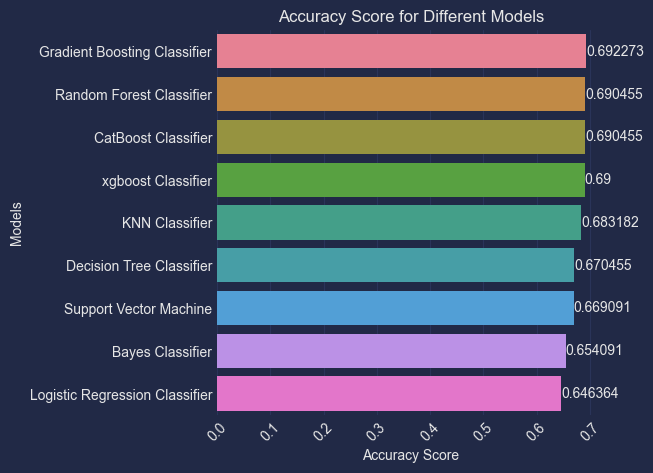

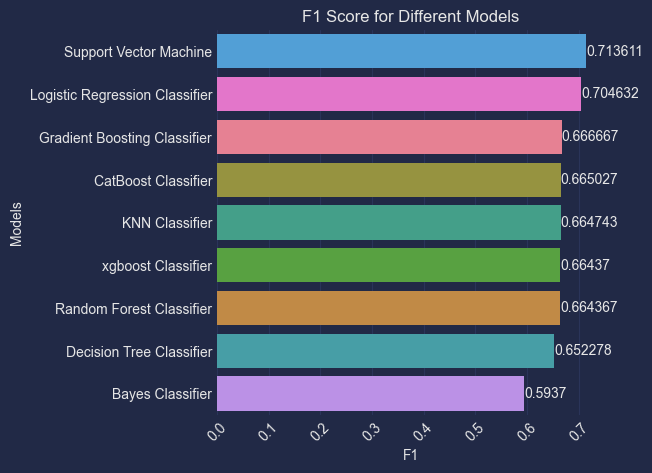

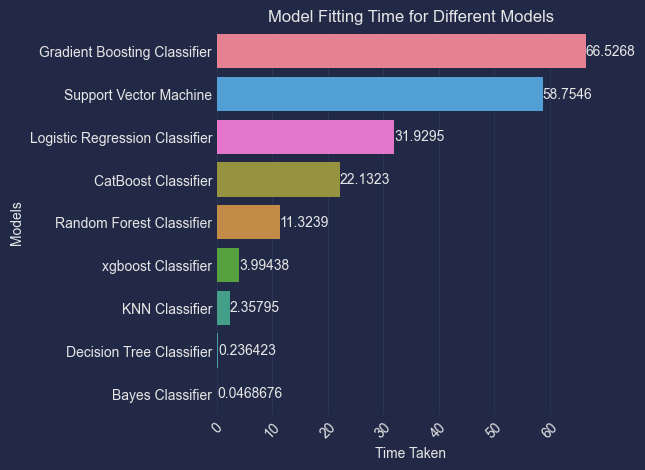

In [50]:
search_plots(fit_models_chi2_RS)

## Conclusion: Machine Learning

Among all the models and feature section methods the best result in term of 

1. F1 score- Support vector machine has been consistantly preforming best amoung the models for the dataset.

In [132]:
# Fitting a SVM Model with tuned hyperparamters 
model = SVC(C= 0.1, degree= 2, kernel= 'poly')
model.fit(X_train,y_train)

# Getting the predicted value 
y_pred = model.predict(X_test)

Accuracy Score is:  0.67
f1 score is : 0.7172897196261682

 The classification report is 
               precision    recall  f1-score   support

           0       0.59      0.62      0.60       895
           1       0.73      0.71      0.72      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.67      0.67      2200



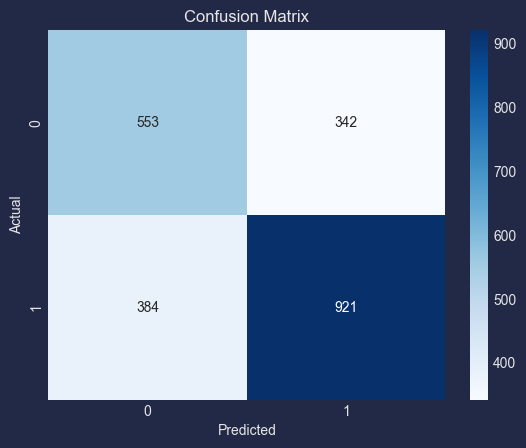

In [136]:
# Getting some metrics for performance evaluation of the model
print('Accuracy Score is: ',accuracy_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
print('\n','The classification report is','\n',classification_report(y_test,y_pred))

# Plotting the confusion matrix 
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True, fmt='',cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2. Accuracy Score: Support vector machine has been consistantly preforming best amoung the models for the dataset. Random Forest showed better accurary score when key features were selected using the statistical methods.

Hyperparameter tuned 'Gradient Boosting Model' fitted on key features selected by f-statistic.

In [150]:
# Fitting a Gradient Boosting Model with tuned hyperparamters 
model = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 300)
model.fit(X_train[key_features_2],y_train)

# Getting the predicted value 
y_pred = model.predict(X_test[key_features_2])

Accuracy Score is:  0.6922727272727273
f1 score is : 0.6666666666666666

 The classification report is 
               precision    recall  f1-score   support

           0       0.57      0.95      0.71       895
           1       0.93      0.52      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.79      0.69      0.69      2200



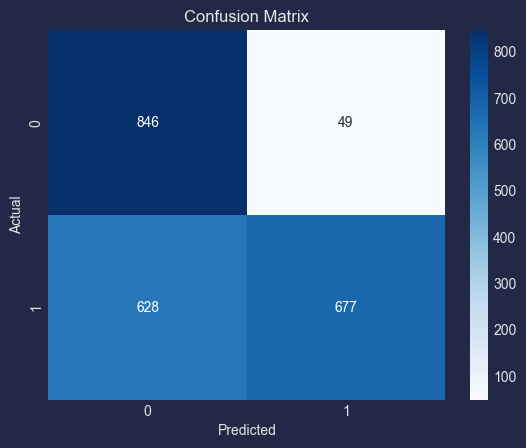

In [151]:
# Getting some metrics for performance evaluation of the model
print('Accuracy Score is: ',accuracy_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
print('\n','The classification report is','\n',classification_report(y_test,y_pred))

# Plotting the confusion matrix 
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True, fmt='',cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hyperparameter tuned 'Random Forest model' fitted on key features selected by chi2-statistic.

In [162]:
# Fitting a Random Forest Model with tuned hyperparamters 
model = RandomForestClassifier(max_depth=5,max_features='sqrt',min_samples_leaf= 2,min_samples_split=15,n_estimators= 25)
model.fit(X_train[key_features_3],y_train)

# Getting the predicted value 
y_pred = model.predict(X_test[key_features_3])

Accuracy Score is:  0.6913636363636364
f1 score is : 0.6695863746958637

 The classification report is 
               precision    recall  f1-score   support

           0       0.57      0.93      0.71       895
           1       0.92      0.53      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.78      0.69      0.69      2200



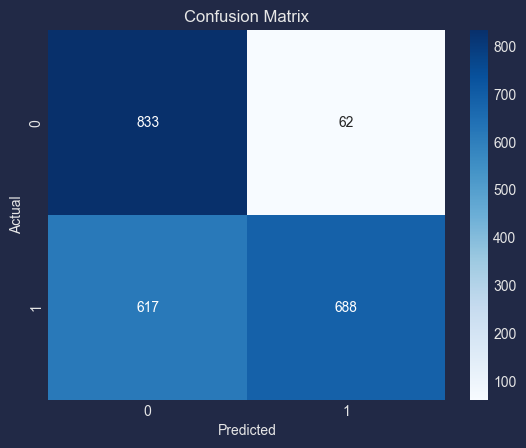

In [163]:
# Getting some metrics for performance evaluation of the model
print('Accuracy Score is: ',accuracy_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))
print('\n','The classification report is','\n',classification_report(y_test,y_pred))

# Plotting the confusion matrix 
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True, fmt='',cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Also it was observed that models fitted on the statistically selected key features showed very less difference from the models fitted on the whole dataset in some cases even showed better results.